<a href="https://colab.research.google.com/github/UjjwalaVayuvegula/4545_jenkins_activity/blob/main/Customer_Retention_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Train data

## Importing Libraries

In [1376]:
pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1377]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from dataprep.eda import plot, create_report
import warnings

In [1378]:
warnings.filterwarnings("ignore")

## EDA on Customer data

In [1379]:
customerdata=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/Customerdata_Train.xlsx")

In [1380]:
customerdata

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  
0                    0                 0               Monday  
1                    1                 1               Friday  
2                    0                 0            Wednesday  
3                    0                 0               Monday  
4                    1                 0               Friday  
...                ...               ...                  ...  
23815                1                 0               Friday  
23816                0                 1               Friday  
23817                0                 0             Saturday  
23818                1                 0             Saturday  
23819                0                 0               Friday  

[23820 rows x 7 columns]

In [1381]:
customerdata.nunique()

CustomerID              23820
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [1382]:
customerdata.duplicated().sum()

0

In [1383]:
customerdata.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

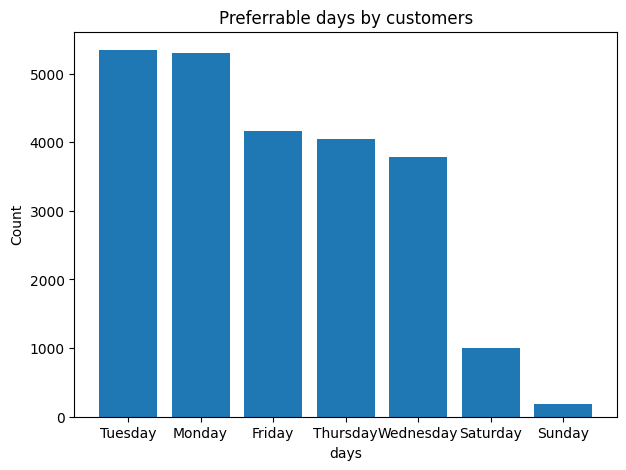

In [1384]:
preferreddays_counts=customerdata['PreferredDeliveryDay'].value_counts()
plt.figure(figsize=(7,5))
plt.bar(preferreddays_counts.index,preferreddays_counts.values)
plt.title('Preferrable days by customers')
plt.xlabel('days')
plt.ylabel('Count')
plt.show()

# from the plot we can observe that most of the customers chose preferrable delivery day as tuesday. and least for sunday.

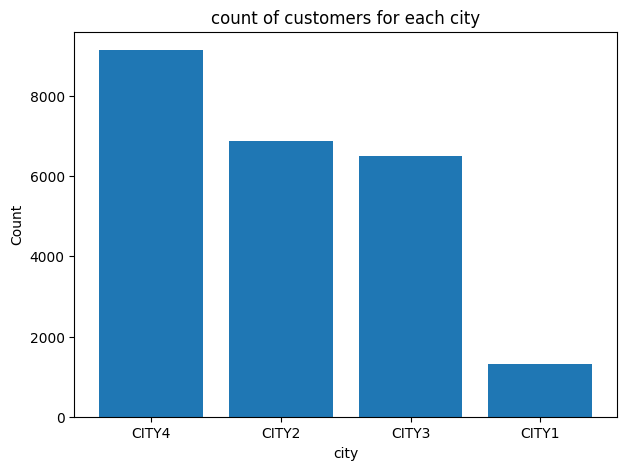

In [1385]:
city_counts=customerdata['City'].value_counts()
plt.figure(figsize=(7,5))
plt.bar(city_counts.index,city_counts.values)
plt.title('count of customers for each city')
plt.xlabel('city')
plt.ylabel('Count')
plt.show()
# from the plot we can observe that there are more no of customers from city 4.

## EDA on train data merging it with customer data

In [1386]:
train_xls=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/Train.xlsx")

In [1387]:
train_xls

CustomerID RetentionPotential
0         C37869                Low
1         C33841                Low
2         C29464                Low
3         C28158                Low
4         C22785               High
...          ...                ...
23815     C14975                Low
23816     C30392                Low
23817     C41735                Low
23818     C26055                Low
23819     C25058               High

[23820 rows x 2 columns]

In [1388]:
train_xls.nunique()

CustomerID            23820
RetentionPotential        3
dtype: int64

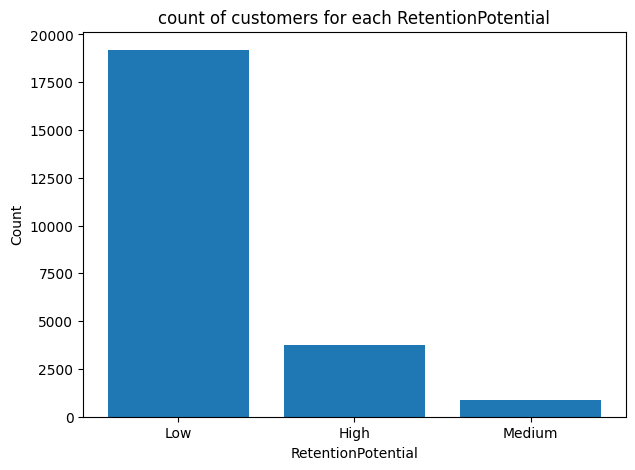

In [1389]:
RetentionPotential_counts=train_xls['RetentionPotential'].value_counts()
plt.figure(figsize=(7,5))
plt.bar(RetentionPotential_counts.index,RetentionPotential_counts.values)
plt.title('count of customers for each RetentionPotential')
plt.xlabel('RetentionPotential')
plt.ylabel('Count')
plt.show()

# There are more customers with low retential potential.

In [1390]:
data1=pd.merge(customerdata,train_xls,how='outer')
data1

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  \
0                    0                 0               Monday   
1                    1                 1               Friday   
2                    0                 0            Wednesday   
3                    0                 0               Monday   
4                    1                 0               Friday   
...                ...               ...                  ...   
23815                1                 0               Friday   
23816                0                 1               Friday   
23817                0                 0             Saturday   
23818                1                 0             Saturday   
23819                0                 0               Friday   

      RetentionPotential  
0                   High  
1                    Low  
2                 Medium  
3                    Low  
4                    Low  
...                  ...  
23815                Low  
23816                Low  
23817                Low  
23818                Low  
23819                Low  

[23820 rows x 8 columns]

In [1391]:
retention_map = {'High': 0, 'Medium': 1, 'Low': 2}

In [1392]:
data1['RetentionPotential_num'] = data1['RetentionPotential'].map(retention_map)

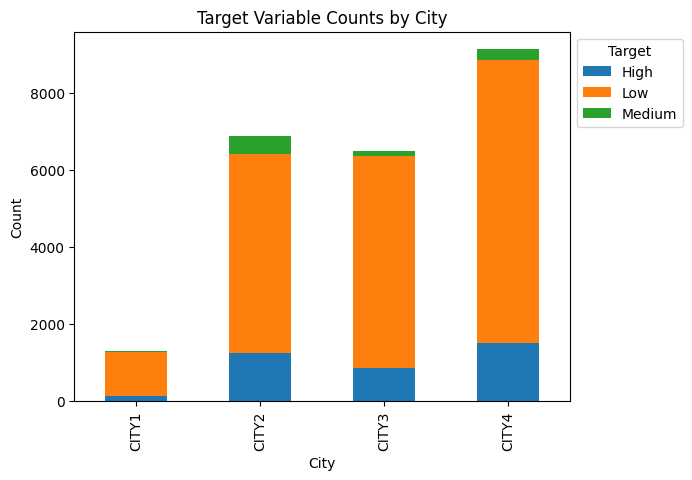

In [1393]:
target_counts_by_city = data1.groupby(['City', 'RetentionPotential']).size().unstack()

# stacked bar chart of the target variable counts by city
target_counts_by_city.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Target Variable Counts by City')
plt.legend(title='Target', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## EDA and feature engineering on Transaction data

In [1394]:
transaction_data=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/transactionsdata_Train.xlsx")
transaction_data.columns=['CustomerID','DateofOrder','timestamp_of_order','OrderQuantity']

In [1395]:
transaction_data

CustomerID DateofOrder timestamp_of_order  OrderQuantity
0          C16368  2013-08-11           15:17:52             15
1          C20345  2011-04-01           19:50:00             92
2          C20345  2012-06-29           15:11:56             95
3          C20345  2012-09-22           20:49:10             74
4          C20345  2011-08-23           11:50:26             81
...           ...         ...                ...            ...
104750     C12197  2018-01-17           14:35:40             56
104751     C40967  2018-01-17           17:15:20             35
104752     C36140  2018-01-17           13:12:54             47
104753     C36140  2018-01-21           21:12:52             53
104754     C42003  2018-01-17           16:34:46             41

[104755 rows x 4 columns]

In [1396]:
print(transaction_data['DateofOrder'].min())
print(transaction_data['DateofOrder'].max())

2008-07-29
2018-01-21


In [1397]:
df= data1[['CustomerID','DateOfRegistration']]
df

CustomerID DateOfRegistration
0         C16368         2012-09-28
1         C20345         2010-12-19
2         C17683         2010-10-03
3         C18647         2010-11-27
4         C36692         2009-12-04
...          ...                ...
23815     C23511         2018-01-17
23816     C12197         2018-01-17
23817     C40967         2018-01-17
23818     C36140         2018-01-17
23819     C42003         2018-01-17

[23820 rows x 2 columns]

In [1398]:
df = pd.merge(transaction_data, df, on='CustomerID', how='left')


In [1399]:
df

CustomerID DateofOrder timestamp_of_order  OrderQuantity  \
0          C16368  2013-08-11           15:17:52             15   
1          C20345  2011-04-01           19:50:00             92   
2          C20345  2012-06-29           15:11:56             95   
3          C20345  2012-09-22           20:49:10             74   
4          C20345  2011-08-23           11:50:26             81   
...           ...         ...                ...            ...   
104750     C12197  2018-01-17           14:35:40             56   
104751     C40967  2018-01-17           17:15:20             35   
104752     C36140  2018-01-17           13:12:54             47   
104753     C36140  2018-01-21           21:12:52             53   
104754     C42003  2018-01-17           16:34:46             41   

       DateOfRegistration  
0              2012-09-28  
1              2010-12-19  
2              2010-12-19  
3              2010-12-19  
4              2010-12-19  
...                   ...  
104750         2018-01-17  
104751         2018-01-17  
104752         2018-01-17  
104753         2018-01-17  
104754         2018-01-17  

[104755 rows x 5 columns]

In [1400]:
df['DateofOrder'] = pd.to_datetime(df['DateofOrder'])

# start and end years for the loop
start_year = df['DateOfRegistration'].min().year
end_year = 2018

for year in range(start_year, end_year+1):
    # start and end dates for the time period
    start_date = pd.Timestamp(year=year, month=1, day=1)
    end_date = pd.Timestamp(year=year, month=12, day=31)
    
    df_period = df[df['DateofOrder'].between(start_date, end_date)]
    
    # Count the number of unique customers who made at least one order during the time period
    num_customers_period = df_period['CustomerID'].nunique()
    
    # Count the number of unique customers in the entire dataset
    num_customers_total = df['CustomerID'].nunique()
    
    # Calculate retention rate
    retention_rate = (num_customers_period / num_customers_total) * 100
    
    # Print the retention rate for the time period
    print(f"Customer retention rate for the period between {start_date.date()} and {end_date.date()}: {retention_rate:.2f}%")


Customer retention rate for the period between 2008-01-01 and 2008-12-31: 0.08%
Customer retention rate for the period between 2009-01-01 and 2009-12-31: 0.91%
Customer retention rate for the period between 2010-01-01 and 2010-12-31: 3.90%
Customer retention rate for the period between 2011-01-01 and 2011-12-31: 13.81%
Customer retention rate for the period between 2012-01-01 and 2012-12-31: 12.70%
Customer retention rate for the period between 2013-01-01 and 2013-12-31: 58.39%
Customer retention rate for the period between 2014-01-01 and 2014-12-31: 11.68%
Customer retention rate for the period between 2015-01-01 and 2015-12-31: 3.43%
Customer retention rate for the period between 2016-01-01 and 2016-12-31: 3.39%
Customer retention rate for the period between 2017-01-01 and 2017-12-31: 14.32%
Customer retention rate for the period between 2018-01-01 and 2018-12-31: 2.76%


In [1401]:
df['DateOfRegistration'] = pd.to_datetime(df['DateOfRegistration'])
df['DateofOrder'] = pd.to_datetime(df['DateofOrder'])

# start and end years for the loop
start_year = df['DateOfRegistration'].min().year
end_year = 2018

# Initializing an empty DataFrame to store the retention rates
retention_df = pd.DataFrame()

# Loop over each year and calculate the retention rate for each customer
for year in range(start_year, end_year+1):
    start_date = pd.Timestamp(year=year, month=1, day=1)
    end_date = pd.Timestamp(year=year, month=12, day=31)
    
    df_period = df[df['DateofOrder'].between(start_date, end_date)]
    
    # Group orders by customer ID
    customer_groups = df_period.groupby('CustomerID')
    
    # Calculating the retention rate for each customer
    retention_rates = customer_groups.size().div(df.groupby('CustomerID').size(), fill_value=0)
    retention_rates *= 100
    
    # Adding the retention rates to the retention DataFrame
    retention_df[f"retention_rate_{year}"] = retention_rates
    
# Joining the retention DataFrame back to the original DataFrame based on the customer ID
df = df.merge(retention_df, left_on='CustomerID', right_index=True)

# Defining a threshold for retention rate
retention_threshold = 50

# Adding a new column to the DataFrame indicating whether a customer was retained or not
df['retained'] = df[[f"retention_rate_{year}" for year in range(start_year, end_year+1)]].ge(retention_threshold).any(axis=1)


df


CustomerID DateofOrder timestamp_of_order  OrderQuantity  \
0          C16368  2013-08-11           15:17:52             15   
1          C20345  2011-04-01           19:50:00             92   
2          C20345  2012-06-29           15:11:56             95   
3          C20345  2012-09-22           20:49:10             74   
4          C20345  2011-08-23           11:50:26             81   
...           ...         ...                ...            ...   
104750     C12197  2018-01-17           14:35:40             56   
104751     C40967  2018-01-17           17:15:20             35   
104752     C36140  2018-01-17           13:12:54             47   
104753     C36140  2018-01-21           21:12:52             53   
104754     C42003  2018-01-17           16:34:46             41   

       DateOfRegistration  retention_rate_2008  retention_rate_2009  \
0              2012-09-28                  0.0                  0.0   
1              2010-12-19                  0.0                  0.0   
2              2010-12-19                  0.0                  0.0   
3              2010-12-19                  0.0                  0.0   
4              2010-12-19                  0.0                  0.0   
...                   ...                  ...                  ...   
104750         2018-01-17                  0.0                  0.0   
104751         2018-01-17                  0.0                  0.0   
104752         2018-01-17                  0.0                  0.0   
104753         2018-01-17                  0.0                  0.0   
104754         2018-01-17                  0.0                  0.0   

        retention_rate_2010  retention_rate_2011  retention_rate_2012  \
0                       0.0             0.000000             0.000000   
1                       0.0            33.333333            36.021505   
2                       0.0            33.333333            36.021505   
3                       0.0            33.333333            36.021505   
4                       0.0            33.333333            36.021505   
...                     ...                  ...                  ...   
104750                  0.0             0.000000             0.000000   
104751                  0.0             0.000000             0.000000   
104752                  0.0             0.000000             0.000000   
104753                  0.0             0.000000             0.000000   
104754                  0.0             0.000000             0.000000   

        retention_rate_2013  retention_rate_2014  retention_rate_2015  \
0                100.000000             0.000000                  0.0   
1                 29.569892             1.075269                  0.0   
2                 29.569892             1.075269                  0.0   
3                 29.569892             1.075269                  0.0   
4                 29.569892             1.075269                  0.0   
...                     ...                  ...                  ...   
104750             0.000000             0.000000                  0.0   
104751             0.000000             0.000000                  0.0   
104752             0.000000             0.000000                  0.0   
104753             0.000000             0.000000                  0.0   
104754             0.000000             0.000000                  0.0   

        retention_rate_2016  retention_rate_2017  retention_rate_2018  \
0                       0.0                  0.0                  0.0   
1                       0.0                  0.0                  0.0   
2                       0.0                  0.0                  0.0   
3                       0.0                  0.0                  0.0   
4                       0.0                  0.0                  0.0   
...                     ...                  ...                  ...   
104750                  0.0                  0.0                100.0   
104751     

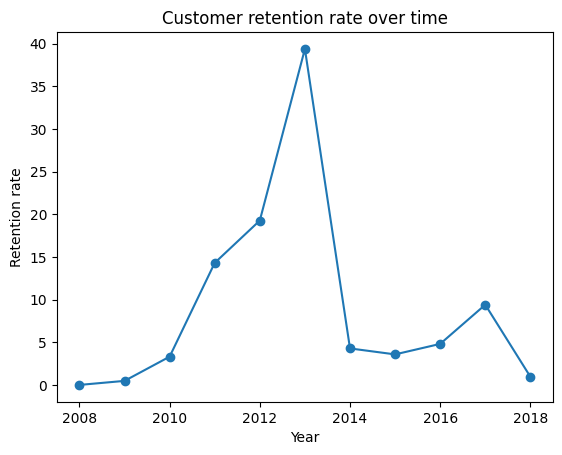

In [1402]:
# line graph of customer retention rate over years. We can observe that till 2014 customer retention rate was increasing and from 2014 there is a big fall.
# Create a list of years
years = range(start_year, end_year+1)

# Create a list of retention rates for each year
retention_rates = []
for year in years:
    retention_rates.append(df[f"retention_rate_{year}"].mean())

# Create a line graph
plt.plot(years, retention_rates, marker='o')

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Retention rate')

# Set the title
plt.title('Customer retention rate over time')

# Show the graph
plt.show()


In [1403]:
data1

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  \
0                    0                 0               Monday   
1                    1                 1               Friday   
2                    0                 0            Wednesday   
3                    0                 0               Monday   
4                    1                 0               Friday   
...                ...               ...                  ...   
23815                1                 0               Friday   
23816                0                 1               Friday   
23817                0                 0             Saturday   
23818                1                 0             Saturday   
23819                0                 0               Friday   

      RetentionPotential  RetentionPotential_num  
0                   High                       0  
1                    Low                       2  
2                 Medium                       1  
3                    Low                       2  
4                    Low                       2  
...                  ...                     ...  
23815                Low                       2  
23816                Low                       2  
23817                Low                       2  
23818                Low                       2  
23819                Low                       2  

[23820 rows x 9 columns]

In [1404]:
customer_row = df.loc[df['CustomerID'] == 'C40967']
customer_row

CustomerID DateofOrder timestamp_of_order  OrderQuantity  \
104751     C40967  2018-01-17           17:15:20             35   

       DateOfRegistration  retention_rate_2008  retention_rate_2009  \
104751         2018-01-17                  0.0                  0.0   

        retention_rate_2010  retention_rate_2011  retention_rate_2012  \
104751                  0.0                  0.0                  0.0   

        retention_rate_2013  retention_rate_2014  retention_rate_2015  \
104751                  0.0                  0.0                  0.0   

        retention_rate_2016  retention_rate_2017  retention_rate_2018  \
104751                  0.0                  0.0                100.0   

        retained  
104751      True

In [1405]:
transaction_data.duplicated().sum()

0

In [1406]:
transaction_data.nunique()

CustomerID            23820
DateofOrder            3151
timestamp_of_order    21399
OrderQuantity           451
dtype: int64

In [1407]:
transaction_data['CustomerID'].value_counts()

C25557    257
C33945    230
C35549    229
C16734    190
C16810    188
         ... 
C39166      1
C12381      1
C37899      1
C21430      1
C42003      1
Name: CustomerID, Length: 23820, dtype: int64

In [1408]:
customer_row = transaction_data.loc[transaction_data['CustomerID'] == 'C25557']
customer_row

CustomerID DateofOrder timestamp_of_order  OrderQuantity
89052     C25557  2014-01-25           21:49:38             81
89053     C25557  2014-09-20           12:09:30             65
89054     C25557  2014-03-15           17:04:36             87
89055     C25557  2014-03-25           19:59:22             61
89056     C25557  2016-01-24           21:59:00             57
...          ...         ...                ...            ...
89304     C25557  2015-08-01           14:07:18             79
89305     C25557  2016-07-04           12:47:20             72
89306     C25557  2015-08-17           11:03:14             50
89307     C25557  2015-10-13           21:58:44             51
89308     C25557  2017-01-08           17:21:32             61

[257 rows x 4 columns]

In [1409]:
transaction_data['DateofOrder'] = pd.to_datetime(transaction_data['DateofOrder'])

In [1410]:
transaction_data['Year'] = transaction_data['DateofOrder'].dt.year

In [1411]:
yearly_quantity = transaction_data.groupby('Year')['OrderQuantity'].sum()

In [1412]:
yearly_quantity 

Year
2008       1237
2009      35371
2010     276890
2011    1287628
2012    1812969
2013    3186085
2014     328548
2015     328761
2016     447635
2017     739904
2018      73550
Name: OrderQuantity, dtype: int64

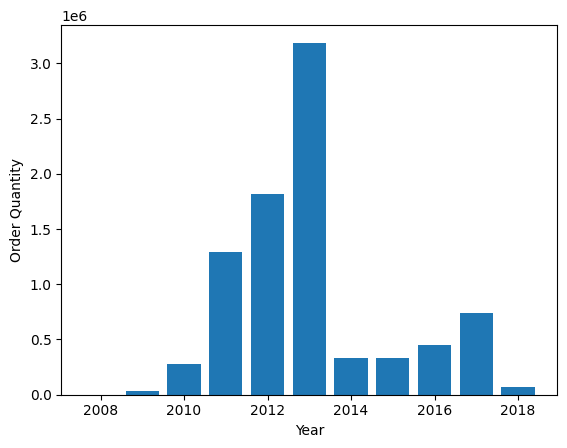

In [1413]:
plt.bar(yearly_quantity.index, yearly_quantity.values)
plt.xlabel('Year')
plt.ylabel('Order Quantity')
plt.show()

In [1414]:
transaction_data['timestamp_of_order'] = pd.to_datetime(transaction_data['timestamp_of_order'], format='%H:%M:%S')

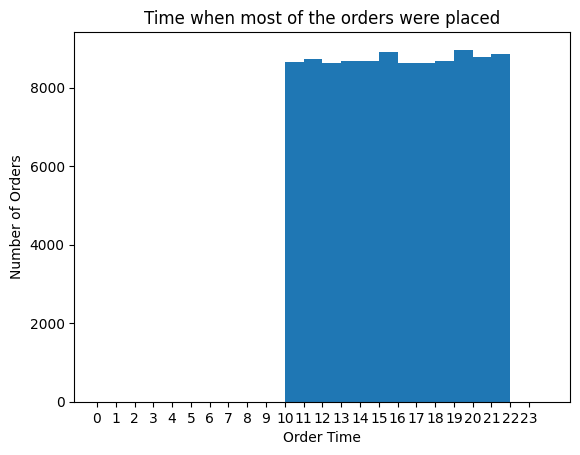

In [1415]:
plt.hist(transaction_data['timestamp_of_order'], bins=24, range=(pd.Timestamp('1900-01-01 00:00:00'), pd.Timestamp('1900-01-02 00:00:00')))

# set the x and y labels
plt.xlabel('Order Time')
plt.ylabel('Number of Orders')
plt.title('Time when most of the orders were placed')
# set the x-axis tick labels to show the hour of the day
plt.xticks([pd.Timestamp('1900-01-01 {0}:00:00'.format(hour)) for hour in range(0, 24)], [str(hour) for hour in range(0, 24)])

# show the plot
plt.show()

In [1416]:
trans=transaction_data.drop(['timestamp_of_order','Year'],axis=1)

In [1417]:
trans

CustomerID DateofOrder  OrderQuantity
0          C16368  2013-08-11             15
1          C20345  2011-04-01             92
2          C20345  2012-06-29             95
3          C20345  2012-09-22             74
4          C20345  2011-08-23             81
...           ...         ...            ...
104750     C12197  2018-01-17             56
104751     C40967  2018-01-17             35
104752     C36140  2018-01-17             47
104753     C36140  2018-01-21             53
104754     C42003  2018-01-17             41

[104755 rows x 3 columns]

In [1418]:
retention_rate = df.groupby('CustomerID').agg({'retention_rate_2008':'min','retention_rate_2009':'min','retention_rate_2010':'min','retention_rate_2011':'min','retention_rate_2012':'min','retention_rate_2013':'min','retention_rate_2014':'min',
                                               'retention_rate_2015':'min','retention_rate_2016':'min','retention_rate_2017':'min','retention_rate_2018':'min','retained':'min'}).reset_index()

In [1419]:
no_of_orders_placed = trans.groupby('CustomerID').agg({'OrderQuantity':'count'}).reset_index()
no_of_orders_placed.columns=['CustomerID','no_of_order']

In [1420]:
no_of_orders_placed

CustomerID  no_of_order
0         C12116            3
1         C12117            1
2         C12118            1
3         C12119            1
4         C12120            1
...          ...          ...
23815     C42185           13
23816     C42186            1
23817     C42187            1
23818     C42188            1
23819     C42189            2

[23820 rows x 2 columns]

In [1421]:
first_order_dates = trans.groupby('CustomerID')['DateofOrder'].min()
pd.DataFrame(first_order_dates)
first_order_dates = first_order_dates.reset_index()
first_order_dates = first_order_dates.rename(columns={'index': 'CustomerID'})
first_order_dates

CustomerID DateofOrder
0         C12116  2013-10-03
1         C12117  2013-12-05
2         C12118  2013-09-10
3         C12119  2013-10-22
4         C12120  2014-01-10
...          ...         ...
23815     C42185  2011-04-04
23816     C42186  2013-11-23
23817     C42187  2013-09-15
23818     C42188  2011-10-04
23819     C42189  2013-05-09

[23820 rows x 2 columns]

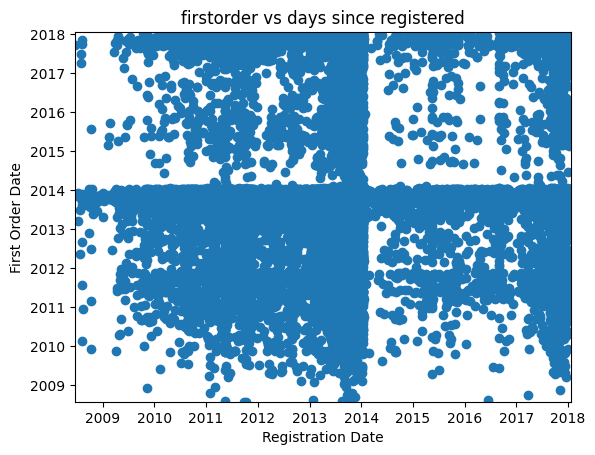

In [1422]:
# scatter plot
plt.scatter(customerdata['DateOfRegistration'],first_order_dates['DateofOrder'])

# set the x and y labels
plt.xlabel('Registration Date')
plt.ylabel('First Order Date')
plt.title('firstorder vs days since registered')

# set the x-axis and y-axis limits to show all dates
plt.xlim(customerdata['DateOfRegistration'].min() - pd.DateOffset(days=1), customerdata['DateOfRegistration'].max() + pd.DateOffset(days=1))
plt.ylim(first_order_dates['DateofOrder'].min() - pd.DateOffset(days=1), first_order_dates['DateofOrder'].max() + pd.DateOffset(days=1))

# show the plot
plt.show()


#If the scatter plot is divided into four boxes inside and the division is at 2014, it suggests that there may be a difference in customer behavior or business performance before and after 2014. 
#If most of the points in all four boxes of the scatter plot are towards the upper right, it suggests that customers are staying with your business for a long time before making their first order. This is a positive trend as it indicates a high level of customer loyalty and engagement.
#If there are more points towards the left side of the plot in the two boxes, and the number of points has reduced over time, it suggests that customers are taking longer to make their first order, or there may be fewer new customers registering over time.

In [1423]:
transactiondata=trans.groupby('CustomerID').agg({'OrderQuantity':'sum','DateofOrder':'min'}).reset_index()
transactiondata

CustomerID  OrderQuantity DateofOrder
0         C12116            115  2013-10-03
1         C12117             41  2013-12-05
2         C12118             41  2013-09-10
3         C12119             52  2013-10-22
4         C12120             31  2014-01-10
...          ...            ...         ...
23815     C42185           1340  2011-04-04
23816     C42186             46  2013-11-23
23817     C42187             41  2013-09-15
23818     C42188             51  2011-10-04
23819     C42189            180  2013-05-09

[23820 rows x 3 columns]

In [1424]:
data2=pd.merge(data1,transactiondata,how='outer')

In [1425]:
data2

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  \
0                    0                 0               Monday   
1                    1                 1               Friday   
2                    0                 0            Wednesday   
3                    0                 0               Monday   
4                    1                 0               Friday   
...                ...               ...                  ...   
23815                1                 0               Friday   
23816                0                 1               Friday   
23817                0                 0             Saturday   
23818                1                 0             Saturday   
23819                0                 0               Friday   

      RetentionPotential  RetentionPotential_num  OrderQuantity DateofOrder  
0                   High                       0             15  2013-08-11  
1                    Low                       2          15614  2011-04-01  
2                 Medium                       1            443  2010-12-01  
3                    Low                       2            748  2010-11-29  
4                    Low                       2           2350  2011-09-21  
...                  ...                     ...            ...         ...  
23815                Low                       2             41  2018-01-17  
23816                Low                       2             56  2018-01-17  
23817                Low                       2             35  2018-01-17  
23818                Low                       2            100  2018-01-17  
23819                Low                       2             41  2018-01-17  

[23820 rows x 11 columns]

In [1426]:
data3=pd.merge(data2,no_of_orders_placed,how='outer')
data3

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  \
0                    0                 0               Monday   
1                    1                 1               Friday   
2                    0                 0            Wednesday   
3                    0                 0               Monday   
4                    1                 0               Friday   
...                ...               ...                  ...   
23815                1                 0               Friday   
23816                0                 1               Friday   
23817                0                 0             Saturday   
23818                1                 0             Saturday   
23819                0                 0               Friday   

      RetentionPotential  RetentionPotential_num  OrderQuantity DateofOrder  \
0                   High                       0             15  2013-08-11   
1                    Low                       2          15614  2011-04-01   
2                 Medium                       1            443  2010-12-01   
3                    Low                       2            748  2010-11-29   
4                    Low                       2           2350  2011-09-21   
...                  ...                     ...            ...         ...   
23815                Low                       2             41  2018-01-17   
23816                Low                       2             56  2018-01-17   
23817                Low                       2             35  2018-01-17   
23818                Low                       2            100  2018-01-17   
23819                Low                       2             41  2018-01-17   

       no_of_order  
0                1  
1              186  
2               13  
3                7  
4               34  
...            ...  
23815            1  
23816            1  
23817            1  
23818            2  
23819            1  

[23820 rows x 12 columns]

In [1427]:
lastorder=trans.groupby('CustomerID').agg({'DateofOrder':'max'}).reset_index()
lastorder.columns=['CustomerID','lastorder']

In [1428]:
data4=pd.merge(data3,lastorder,how='outer')
data4

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  \
0                    0                 0               Monday   
1                    1                 1               Friday   
2                    0                 0            Wednesday   
3                    0                 0               Monday   
4                    1                 0               Friday   
...                ...               ...                  ...   
23815                1                 0               Friday   
23816                0                 1               Friday   
23817                0                 0             Saturday   
23818                1                 0             Saturday   
23819                0                 0               Friday   

      RetentionPotential  RetentionPotential_num  OrderQuantity DateofOrder  \
0                   High                       0             15  2013-08-11   
1                    Low                       2          15614  2011-04-01   
2                 Medium                       1            443  2010-12-01   
3                    Low                       2            748  2010-11-29   
4                    Low                       2           2350  2011-09-21   
...                  ...                     ...            ...         ...   
23815                Low                       2             41  2018-01-17   
23816                Low                       2             56  2018-01-17   
23817                Low                       2             35  2018-01-17   
23818                Low                       2            100  2018-01-17   
23819                Low                       2             41  2018-01-17   

       no_of_order  lastorder  
0                1 2013-08-11  
1              186 2014-01-19  
2               13 2011-07-06  
3                7 2013-01-28  
4               34 2014-01-16  
...            ...        ...  
23815            1 2018-01-17  
23816            1 2018-01-17  
23817            1 2018-01-17  
23818            2 2018-01-21  
23819            1 2018-01-17  

[23820 rows x 13 columns]

In [1429]:
data4=pd.merge(data4,retention_rate,how='outer')
data4

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  \
0                    0                 0               Monday   
1                    1                 1               Friday   
2                    0                 0            Wednesday   
3                    0                 0               Monday   
4                    1                 0               Friday   
...                ...               ...                  ...   
23815                1                 0               Friday   
23816                0                 1               Friday   
23817                0                 0             Saturday   
23818                1                 0             Saturday   
23819                0                 0               Friday   

      RetentionPotential  RetentionPotential_num  OrderQuantity  ...  \
0                   High                       0             15  ...   
1                    Low                       2          15614  ...   
2                 Medium                       1            443  ...   
3                    Low                       2            748  ...   
4                    Low                       2           2350  ...   
...                  ...                     ...            ...  ...   
23815                Low                       2             41  ...   
23816                Low                       2             56  ...   
23817                Low                       2             35  ...   
23818                Low                       2            100  ...   
23819                Low                       2             41  ...   

      retention_rate_2010  retention_rate_2011 retention_rate_2012  \
0                0.000000             0.000000            0.000000   
1                0.000000            33.333333           36.021505   
2               15.384615            84.615385            0.000000   
3               14.285714            42.857143           28.571429   
4                0.000000            14.705882           32.352941   
...                   ...                  ...                 ...   
23815            0.000000             0.000000            0.000000   
23816            0.000000             0.000000            0.000000   
23817            0.000000             0.000000            0.000000   
23818            0.000000             0.000000            0.000000   
23819            0.000000             0.000000            0.000000   

       retention_rate_2013  retention_rate_2014  retention_rate_2015  \
0               100.000000             0.000000                  0.0   
1                29.569892             1.075269                  0.0   
2                 0.000000             0.000000                  0.0   
3                14.285714             0.000000                  0.0   
4                50.000000             2.941176                  0.0   
...                    ...                  ...                  ...   
23815             0.000000             0.000000                  0.0   
23816             0.000000             0.000000                  0.0   
23817             0.000000             0.000000                  0

In [1430]:
current_date = pd.to_datetime('today').normalize()
data4['days b/w R&F']= (data4['DateofOrder'] - data4['DateOfRegistration']).dt.days
data4['DaysSinceRegistration']= (current_date - data4['DateOfRegistration']).dt.days
data4['DaysSinceLastOrder'] = (current_date - data4['lastorder']).dt.days
data4['Days b/w F&L']= (data4['lastorder'] - data4['DateofOrder']).dt.days

In [1431]:
data4

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  \
0                    0                 0               Monday   
1                    1                 1               Friday   
2                    0                 0            Wednesday   
3                    0                 0               Monday   
4                    1                 0               Friday   
...                ...               ...                  ...   
23815                1                 0               Friday   
23816                0                 1               Friday   
23817                0                 0             Saturday   
23818                1                 0             Saturday   
23819                0                 0               Friday   

      RetentionPotential  RetentionPotential_num  OrderQuantity  ...  \
0                   High                       0             15  ...   
1                    Low                       2          15614  ...   
2                 Medium                       1            443  ...   
3                    Low                       2            748  ...   
4                    Low                       2           2350  ...   
...                  ...                     ...            ...  ...   
23815                Low                       2             41  ...   
23816                Low                       2             56  ...   
23817                Low                       2             35  ...   
23818                Low                       2            100  ...   
23819                Low                       2             41  ...   

      retention_rate_2014  retention_rate_2015 retention_rate_2016  \
0                0.000000                  0.0                 0.0   
1                1.075269                  0.0                 0.0   
2                0.000000                  0.0                 0.0   
3                0.000000                  0.0                 0.0   
4                2.941176                  0.0                 0.0   
...                   ...                  ...                 ...   
23815            0.000000                  0.0                 0.0   
23816            0.000000                  0.0                 0.0   
23817            0.000000                  0.0                 0.0   
23818            0.000000                  0.0                 0.0   
23819            0.000000                  0.0                 0.0   

       retention_rate_2017  retention_rate_2018  retained  days b/w R&F  \
0                      0.0                  0.0      True           317   
1                      0.0                  0.0     False           103   
2                      0.0                  0.0      True            59   
3                      0.0                  0.0     False             2   
4                      0.0                  0.0      True           656   
...                    ...                  ...       ...           ...   
23815                  0.0                100.0      True             0   
23816                  0.0                100.0      True             0   
23817                  0.0             

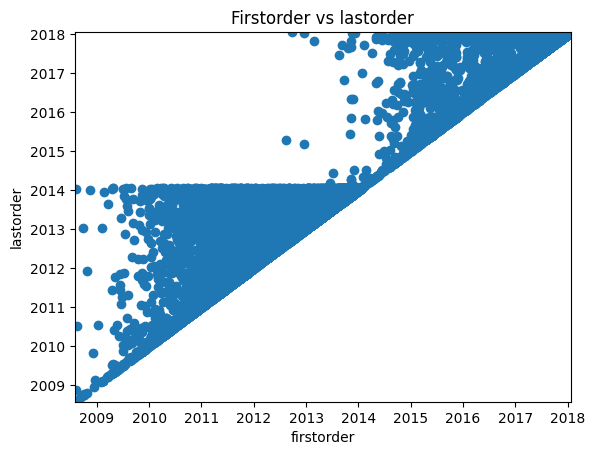

In [1432]:
# scatter plot
plt.scatter(data4['DateofOrder'],data4['lastorder'])

# set the x and y labels
plt.xlabel('firstorder')
plt.ylabel('lastorder')
plt.title('Firstorder vs lastorder')

# set the x-axis and y-axis limits to show all dates
plt.xlim(data4['DateofOrder'].min() - pd.DateOffset(days=1), data4['DateofOrder'].max() + pd.DateOffset(days=1))
plt.ylim(data4['lastorder'].min() - pd.DateOffset(days=1), data4['lastorder'].max() + pd.DateOffset(days=1))

# show the plot
plt.show()



#If most of the points in the scatter plot fall in the upper left triangle, it suggests that customers tend to place their last order relatively soon after their first order, which could indicate that they are not staying engaged with your business over time.

In [1433]:
data4=data4.drop(['DateOfRegistration','DateofOrder','lastorder'],axis=1)

In [1434]:
data4

CustomerID   City  OnlineCommunication  AutomaticRefill  \
0         C16368  CITY2                    0                0   
1         C20345  CITY2                    1                1   
2         C17683  CITY2                    0                0   
3         C18647  CITY4                    0                0   
4         C36692  CITY2                    1                1   
...          ...    ...                  ...              ...   
23815     C23511  CITY2                    1                1   
23816     C12197  CITY3                    1                0   
23817     C40967  CITY3                    1                0   
23818     C36140  CITY3                    1                1   
23819     C42003  CITY4                    1                0   

       DoorstepDelivery PreferredDeliveryDay RetentionPotential  \
0                     0               Monday               High   
1                     1               Friday                Low   
2                     0            Wednesday             Medium   
3                     0               Monday                Low   
4                     0               Friday                Low   
...                 ...                  ...                ...   
23815                 0               Friday                Low   
23816                 1               Friday                Low   
23817                 0             Saturday                Low   
23818                 0             Saturday                Low   
23819                 0               Friday                Low   

       RetentionPotential_num  OrderQuantity  no_of_order  ...  \
0                           0             15            1  ...   
1                           2          15614          186  ...   
2                           1            443           13  ...   
3                           2            748            7  ...   
4                           2           2350           34  ...   
...                       ...            ...          ...  ...   
23815                       2             41            1  ...   
23816                       2             56            1  ...   
23817                       2             35            1  ...   
23818                       2            100            2  ...   
23819                       2             41            1  ...   

       retention_rate_2014  retention_rate_2015  retention_rate_2016  \
0                 0.000000                  0.0                  0.0   
1                 1.075269                  0.0                  0.0   
2                 0.000000                  0.0                  0.0   
3                 0.000000                  0.0                  0.0   
4                 2.941176                  0.0                  0.0   
...                    ...                  ...                  ...   
23815             0.000000                  0.0                  0.0   
23816             0.000000                  0.0                  0.0   
23817             0.000000                  0.0                  0.0   
23818             0.000000                  0.0                  0.0   
23819             0.000000                  0.0                  0.0   

       retention_rate_2017  retention_rate_2018  retained  days b/w R&F  \
0                      0.0                  0.0      True           317   
1                      0.0                  0.0     False           103   
2                      0.0                  0.0      True            59   
3                      0.0                  0.0     False             2   
4                      0.0                  0.0      True           656   
...                    ...                  ...       ...           ...   
23815                  0.0                100.0      True             0   
23816                  0.0                100.0      True             0   
23817                  0.0                100.0      True             0   
23818       

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2cbf83a310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2cbc777b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2cbf83a460>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2cbc777c40>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2cbc777460>,
 'means': []}

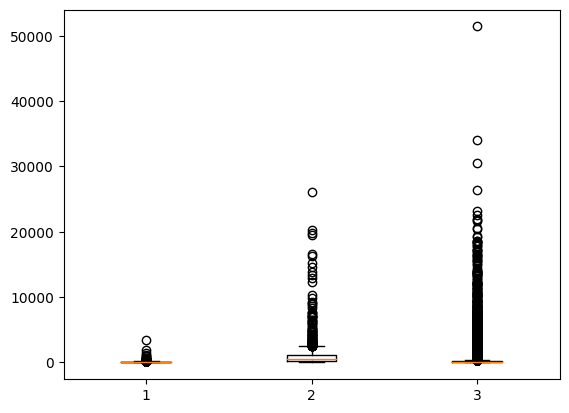

In [1435]:
# boxplot gives the spread of data. we can observe from the grapf that there are a lot of outliers in the data.
order_by_retention = data4.groupby('RetentionPotential_num')['OrderQuantity'].apply(list)
plt.boxplot(order_by_retention.values)

In [1436]:
# Calculate the quartiles and interquartile range
q1, q3 = np.percentile(data4['OrderQuantity'], [25, 75])
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
data_no_outliers = data4[(data4['OrderQuantity'] >= lower_bound) & (data4['OrderQuantity'] <= upper_bound)]


In [1437]:
data_no_outliers

CustomerID   City  OnlineCommunication  AutomaticRefill  \
0         C16368  CITY2                    0                0   
15        C29837  CITY4                    0                0   
16        C19535  CITY2                    0                0   
18        C13691  CITY2                    0                0   
19        C27615  CITY2                    0                0   
...          ...    ...                  ...              ...   
23815     C23511  CITY2                    1                1   
23816     C12197  CITY3                    1                0   
23817     C40967  CITY3                    1                0   
23818     C36140  CITY3                    1                1   
23819     C42003  CITY4                    1                0   

       DoorstepDelivery PreferredDeliveryDay RetentionPotential  \
0                     0               Monday               High   
15                    0               Monday               High   
16                    0            Wednesday                Low   
18                    0              Tuesday               High   
19                    0              Tuesday                Low   
...                 ...                  ...                ...   
23815                 0               Friday                Low   
23816                 1               Friday                Low   
23817                 0             Saturday                Low   
23818                 0             Saturday                Low   
23819                 0               Friday                Low   

       RetentionPotential_num  OrderQuantity  no_of_order  ...  \
0                           0             15            1  ...   
15                          0             30            1  ...   
16                          2            313            4  ...   
18                          0            312            4  ...   
19                          2            342            4  ...   
...                       ...            ...          ...  ...   
23815                       2             41            1  ...   
23816                       2             56            1  ...   
23817                       2             35            1  ...   
23818                       2            100            2  ...   
23819                       2             41            1  ...   

       retention_rate_2014  retention_rate_2015  retention_rate_2016  \
0                      0.0                  0.0                  0.0   
15                     0.0                  0.0                  0.0   
16                     0.0                  0.0                  0.0   
18                     0.0                  0.0                  0.0   
19                     0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
23815                  0.0                  0.0                  0.0   
23816                  0.0                  0.0                  0.0   
23817                  0.0                  0.0                  0.0   
23818                  0.0                  0.0                  0.0   
23819                  0.0                  0.0                  0.0   

       retention_rate_2017  retention_rate_2018  retained  days b/w R&F  \
0                      0.0                  0.0      True           317   
15                     0.0                  0.0      True            69   
16                     0.0                  0.0      True             1   
18                     0.0                  0.0      True            45   
19                     0.0                  0.0      True           138   
...                    ...                  ...       ...           ...   
23815                  0.0                100.0      True             0   
23816                  0.0                100.0      True             0   
23817                  0.0                100.0      True             0   
23818       

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2cbc7d2bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2cbca28bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2cbc7d2cd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2cbca282e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2cbca28130>,
 'means': []}

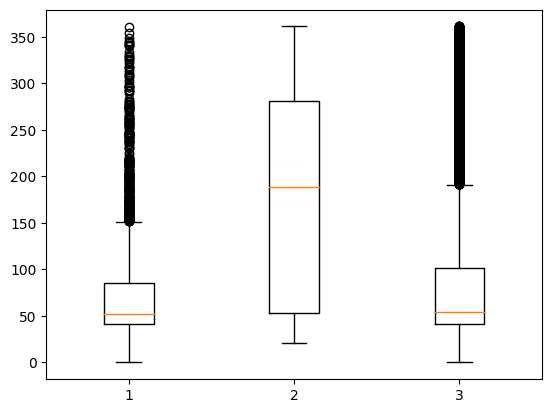

In [1438]:
# boxplot after removing outliers using IQR mthod. But, we can observe there are still few outliers for low and high classes.
order_by_retention = data_no_outliers .groupby('RetentionPotential_num')['OrderQuantity'].apply(list)
plt.boxplot(order_by_retention.values)

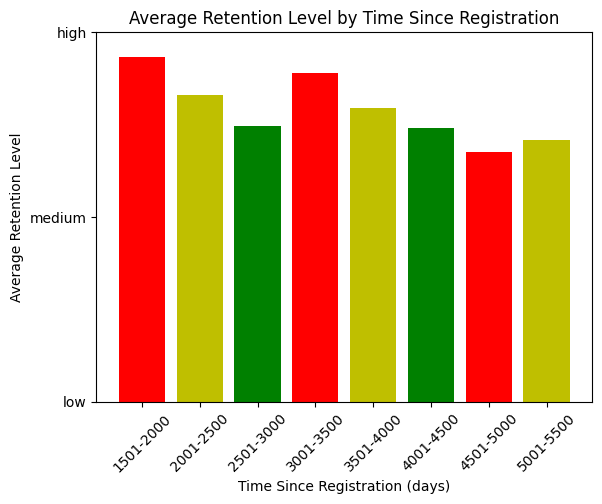

In [1439]:
# Bar graph showing average retention level according to the time since the customer registered.

# Converting time since registration to categorical variable based on intervals
data4['DaysSinceRegistrationcat'] = pd.cut(data4['DaysSinceRegistration'], bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000], labels=['0-500', '501-1000', '1001-1500', '1501-2000','2001-2500','2501-3000','3001-3500','3501-4000','4001-4500','4501-5000','5001-5500','5501-6000','6001-6500','6501-7000'])

# Calculating average retention level for each time interval
avg_retention = data4.groupby('DaysSinceRegistrationcat')['RetentionPotential_num'].mean()

# Defining the order of the retention levels
retention_order = ['low', 'medium', 'high']

# Plot the bar chart
plt.bar(avg_retention.index, avg_retention.values, color=['r', 'y', 'g'], align='center')
plt.xlabel('Time Since Registration (days)')
plt.ylabel('Average Retention Level')
plt.title('Average Retention Level by Time Since Registration')
plt.xticks(rotation=45)
plt.yticks([0, 1, 2], retention_order)
plt.show()

In [1440]:
data4['DaysSinceLastOrder'].max()

5372

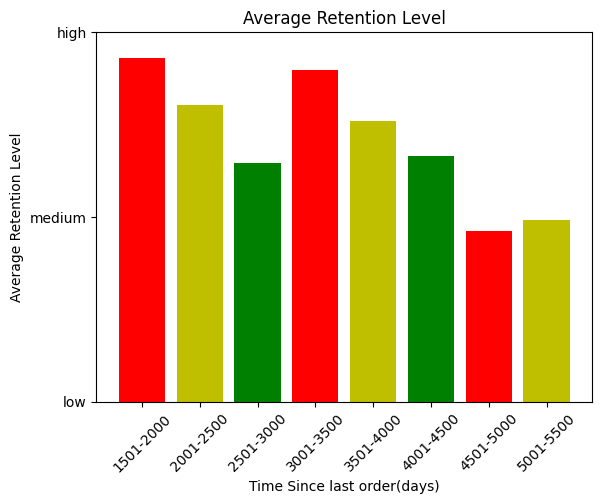

In [1441]:
# Bar graph showing average retention level according to the customers last order placed.

data4['DaysSincelastordercat'] = pd.cut(data4['DaysSinceLastOrder'],bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000],  labels=['0-500', '501-1000', '1001-1500', '1501-2000','2001-2500','2501-3000','3001-3500','3501-4000','4001-4500','4501-5000','5001-5500','5501-6000'])


# Calculating average retention level for each time interval
avg_retention = data4.groupby('DaysSincelastordercat')['RetentionPotential_num'].mean()

# Defining the order of the retention levels
retention_order = ['low', 'medium', 'high']

# Plot the bar chart
plt.bar(avg_retention.index, avg_retention.values, color=['r', 'y', 'g'], align='center')
plt.xlabel('Time Since last order(days)')
plt.ylabel('Average Retention Level')
plt.title('Average Retention Level')
plt.xticks(rotation=45)
plt.yticks([0, 1, 2], retention_order)
plt.show()

In [1442]:
data4=data4.drop(['DaysSinceRegistrationcat','DaysSincelastordercat'],axis=1)

## EDA and feature engineering on Email data

In [1443]:
emaildata=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/Emaildata_Train.xlsx")
emaildata.columns=['CustomerID','Dateofemail','EmailType','timestamp_of_sent','MailOpened','MailClicked']

In [1444]:
emaildata

CustomerID Dateofemail        EmailType timestamp_of_sent MailOpened  \
0          C16368  2012-09-28     WelcomeEmail          15:56:50        yes   
1          C20345  2010-12-19     WelcomeEmail          15:10:30        yes   
2          C17683  2010-10-03     WelcomeEmail          17:12:24        yes   
3          C18647  2010-11-27     WelcomeEmail          16:59:02        yes   
4          C36692  2009-12-04     WelcomeEmail          17:27:22        yes   
...           ...         ...              ...               ...        ...   
517667     C36140  2018-01-18  CustomizedEmail          14:04:44        yes   
517668     C36140  2018-01-21  CustomizedEmail          16:17:16         no   
517669     C36140  2018-01-20  CustomizedEmail          12:17:34        yes   
517670     C36140  2018-01-20  CustomizedEmail          16:31:18        yes   
517671     C36140  2018-01-21  CustomizedEmail          14:23:16        yes   

          MailClicked  
0       NotApplicable  
1       NotApplicable  
2       NotApplicable  
3       NotApplicable  
4       NotApplicable  
...               ...  
517667            yes  
517668             no  
517669            yes  
517670             no  
517671            yes  

[517672 rows x 6 columns]

In [1445]:
emaildata.nunique()

CustomerID           23820
Dateofemail           3382
EmailType                2
timestamp_of_sent    14369
MailOpened               2
MailClicked              3
dtype: int64

In [1446]:
emaildata['EmailType'].value_counts()

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

In [1447]:
emaildata['MailClicked'].value_counts()

no               466011
yes               27841
NotApplicable     23820
Name: MailClicked, dtype: int64

In [1448]:
# Calculate the number of emails opened
num_emails_opened = emaildata[emaildata['MailOpened'] == 'yes']['MailOpened'].count()

# Calculate the total number of emails sent
total_emails_sent = emaildata['MailOpened'].count()

# Calculate the open rate as a percentage
open_rate = num_emails_opened / total_emails_sent * 100

# Print the open rate
print(f"Open rate: {open_rate:.2f}%")


Open rate: 28.56%


In [1449]:
grouped=emaildata.groupby(['CustomerID','EmailType']).size().reset_index(name='count')
grouped

CustomerID        EmailType  count
0         C12116  CustomizedEmail     31
1         C12116     WelcomeEmail      1
2         C12117     WelcomeEmail      1
3         C12118     WelcomeEmail      1
4         C12119  CustomizedEmail     41
...          ...              ...    ...
37926     C42186     WelcomeEmail      1
37927     C42187     WelcomeEmail      1
37928     C42188     WelcomeEmail      1
37929     C42189  CustomizedEmail     50
37930     C42189     WelcomeEmail      1

[37931 rows x 3 columns]

In [1450]:
pivot = pd.pivot_table(grouped, index='CustomerID', columns='EmailType', values='count').reset_index()
pivot.columns.name=None

In [1451]:
pivot.columns=['CustomerID','Customizedemailcount','Welcomeemailcount']
pivot

CustomerID  Customizedemailcount  Welcomeemailcount
0         C12116                  31.0                1.0
1         C12117                   NaN                1.0
2         C12118                   NaN                1.0
3         C12119                  41.0                1.0
4         C12120                   NaN                1.0
...          ...                   ...                ...
23815     C42185                  43.0                1.0
23816     C42186                   NaN                1.0
23817     C42187                   NaN                1.0
23818     C42188                   NaN                1.0
23819     C42189                  50.0                1.0

[23820 rows x 3 columns]

In [1452]:
pivot=pivot.drop('Welcomeemailcount',axis=1)

In [1453]:
pivot.fillna(0,inplace=True)

In [1454]:
pivot['Customizedemailcount']=pivot['Customizedemailcount'].astype('int64')

In [1455]:
pivot=pd.DataFrame(pivot)
pivot

CustomerID  Customizedemailcount
0         C12116                    31
1         C12117                     0
2         C12118                     0
3         C12119                    41
4         C12120                     0
...          ...                   ...
23815     C42185                    43
23816     C42186                     0
23817     C42187                     0
23818     C42188                     0
23819     C42189                    50

[23820 rows x 2 columns]

In [1456]:
emaildata['timestamp_of_sent'] = pd.to_datetime(emaildata['timestamp_of_sent'], format='%H:%M:%S')

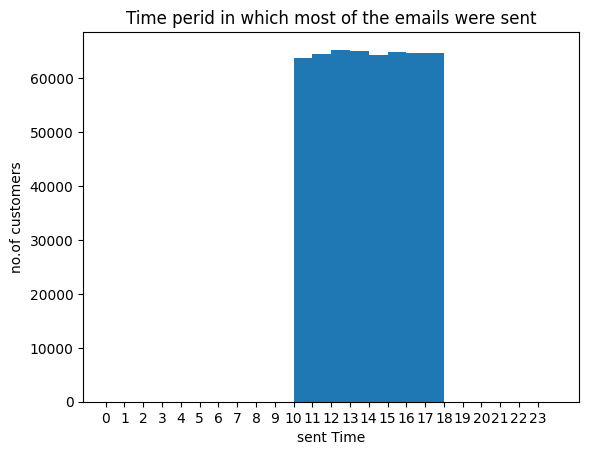

In [1457]:
# histogram, to understand at what time most of the emails are sent.

plt.hist(emaildata['timestamp_of_sent'], bins=24, range=(pd.Timestamp('1900-01-01 00:00:00'), pd.Timestamp('1900-01-02 00:00:00')))

# set the x and y labels
plt.xlabel('sent Time')
plt.ylabel('no.of customers')
plt.title('Time perid in which most of the emails were sent')

# set the x-axis tick labels to show the hour of the day
plt.xticks([pd.Timestamp('1900-01-01 {0}:00:00'.format(hour)) for hour in range(0, 24)], [str(hour) for hour in range(0, 24)])

# show the plot
plt.show()

In [1458]:
df=emaildata.drop('timestamp_of_sent',axis=1)

In [1459]:
df.isnull().sum()

CustomerID     0
Dateofemail    0
EmailType      0
MailOpened     0
MailClicked    0
dtype: int64

In [1460]:
df['Dateofemail'] = pd.to_datetime(df['Dateofemail'])

In [1461]:
firstemail=df.groupby('CustomerID').agg({'Dateofemail':'min'}).reset_index()
firstemail.columns=['CustomerID','firstemail']
firstemail

CustomerID firstemail
0         C12116 2013-09-23
1         C12117 2013-12-05
2         C12118 2013-09-10
3         C12119 2013-04-13
4         C12120 2014-01-10
...          ...        ...
23815     C42185 2011-03-03
23816     C42186 2013-11-23
23817     C42187 2013-09-15
23818     C42188 2011-10-04
23819     C42189 2013-01-17

[23820 rows x 2 columns]

In [1462]:
lastemail=df.groupby('CustomerID').agg({'Dateofemail':'max'}).reset_index()
lastemail.columns=['CustomerID','lastemail']
lastemail

CustomerID  lastemail
0         C12116 2013-10-09
1         C12117 2013-12-05
2         C12118 2013-09-10
3         C12119 2013-10-21
4         C12120 2014-01-10
...          ...        ...
23815     C42185 2011-12-30
23816     C42186 2013-11-23
23817     C42187 2013-09-15
23818     C42188 2011-10-04
23819     C42189 2013-11-05

[23820 rows x 2 columns]

In [1463]:
grouped=emaildata.groupby(['CustomerID','MailOpened']).size().reset_index(name='count')
grouped

CustomerID MailOpened  count
0         C12116         no     27
1         C12116        yes      5
2         C12117        yes      1
3         C12118        yes      1
4         C12119         no     28
...          ...        ...    ...
37436     C42186        yes      1
37437     C42187        yes      1
37438     C42188        yes      1
37439     C42189         no     32
37440     C42189        yes     19

[37441 rows x 3 columns]

In [1464]:
pivot_for_mailopened = pd.pivot_table(grouped, index='CustomerID', columns='MailOpened', values='count').reset_index()
pivot_for_mailopened.columns.name=None

In [1465]:
pivot_for_mailopened.columns=['CustomerID','opened-yes','opened-no']
pivot_for_mailopened

CustomerID  opened-yes  opened-no
0         C12116        27.0        5.0
1         C12117         NaN        1.0
2         C12118         NaN        1.0
3         C12119        28.0       14.0
4         C12120         NaN        1.0
...          ...         ...        ...
23815     C42185        34.0       10.0
23816     C42186         NaN        1.0
23817     C42187         NaN        1.0
23818     C42188         NaN        1.0
23819     C42189        32.0       19.0

[23820 rows x 3 columns]

In [1466]:
pivot_for_mailopened['opened-yes']=pivot_for_mailopened['opened-yes'].fillna(0)

In [1467]:
pivot_for_mailopened[['opened-yes','opened-no']]=pivot_for_mailopened[['opened-yes','opened-no']].astype('int64')

In [1468]:
pivot_for_mailopened

CustomerID  opened-yes  opened-no
0         C12116          27          5
1         C12117           0          1
2         C12118           0          1
3         C12119          28         14
4         C12120           0          1
...          ...         ...        ...
23815     C42185          34         10
23816     C42186           0          1
23817     C42187           0          1
23818     C42188           0          1
23819     C42189          32         19

[23820 rows x 3 columns]

In [1469]:
grouped=emaildata.groupby(['CustomerID','MailClicked']).size().reset_index(name='count')
grouped

CustomerID    MailClicked  count
0         C12116  NotApplicable      1
1         C12116             no     29
2         C12116            yes      2
3         C12117  NotApplicable      1
4         C12118  NotApplicable      1
...          ...            ...    ...
46519     C42186  NotApplicable      1
46520     C42187  NotApplicable      1
46521     C42188  NotApplicable      1
46522     C42189  NotApplicable      1
46523     C42189             no     50

[46524 rows x 3 columns]

In [1470]:
pivot_for_mailclicked = pd.pivot_table(grouped, index='CustomerID', columns='MailClicked', values='count').reset_index()
pivot_for_mailclicked.columns.name=None

In [1471]:
pivot_for_mailclicked

CustomerID  NotApplicable    no  yes
0         C12116            1.0  29.0  2.0
1         C12117            1.0   NaN  NaN
2         C12118            1.0   NaN  NaN
3         C12119            1.0  37.0  4.0
4         C12120            1.0   NaN  NaN
...          ...            ...   ...  ...
23815     C42185            1.0  43.0  NaN
23816     C42186            1.0   NaN  NaN
23817     C42187            1.0   NaN  NaN
23818     C42188            1.0   NaN  NaN
23819     C42189            1.0  50.0  NaN

[23820 rows x 4 columns]

In [1472]:
pivot_for_mailclicked.columns=['CustomerID','Notapplicable','clicked-yes','clicked-no']
pivot_for_mailclicked

CustomerID  Notapplicable  clicked-yes  clicked-no
0         C12116            1.0         29.0         2.0
1         C12117            1.0          NaN         NaN
2         C12118            1.0          NaN         NaN
3         C12119            1.0         37.0         4.0
4         C12120            1.0          NaN         NaN
...          ...            ...          ...         ...
23815     C42185            1.0         43.0         NaN
23816     C42186            1.0          NaN         NaN
23817     C42187            1.0          NaN         NaN
23818     C42188            1.0          NaN         NaN
23819     C42189            1.0         50.0         NaN

[23820 rows x 4 columns]

In [1473]:
pivot_for_mailclicked[['Notapplicable','clicked-yes','clicked-no']]=pivot_for_mailclicked[['Notapplicable','clicked-yes','clicked-no']].fillna(0)

In [1474]:
pivot_for_mailclicked[['Notapplicable','clicked-yes','clicked-no']]=pivot_for_mailclicked[['Notapplicable','clicked-yes','clicked-no']].astype('int64')

In [1475]:
pivot_for_mailclicked

CustomerID  Notapplicable  clicked-yes  clicked-no
0         C12116              1           29           2
1         C12117              1            0           0
2         C12118              1            0           0
3         C12119              1           37           4
4         C12120              1            0           0
...          ...            ...          ...         ...
23815     C42185              1           43           0
23816     C42186              1            0           0
23817     C42187              1            0           0
23818     C42188              1            0           0
23819     C42189              1           50           0

[23820 rows x 4 columns]

In [1476]:
pivot_for_mailclicked2=pivot_for_mailclicked.drop('Notapplicable',axis=1)

In [1477]:
email_data=pd.merge(pivot,firstemail,how='outer')

In [1478]:
email_data=pd.merge(email_data,lastemail,how='outer')

In [1479]:
email_data=pd.merge(email_data,pivot,how='outer')

In [1480]:
email_data=pd.merge(email_data,pivot_for_mailopened,how='outer')

In [1481]:
email_data=pd.merge(email_data,pivot_for_mailclicked2,how='outer')
email_data

CustomerID  Customizedemailcount firstemail  lastemail  opened-yes  \
0         C12116                    31 2013-09-23 2013-10-09          27   
1         C12117                     0 2013-12-05 2013-12-05           0   
2         C12118                     0 2013-09-10 2013-09-10           0   
3         C12119                    41 2013-04-13 2013-10-21          28   
4         C12120                     0 2014-01-10 2014-01-10           0   
...          ...                   ...        ...        ...         ...   
23815     C42185                    43 2011-03-03 2011-12-30          34   
23816     C42186                     0 2013-11-23 2013-11-23           0   
23817     C42187                     0 2013-09-15 2013-09-15           0   
23818     C42188                     0 2011-10-04 2011-10-04           0   
23819     C42189                    50 2013-01-17 2013-11-05          32   

       opened-no  clicked-yes  clicked-no  
0              5           29           2  
1              1            0           0  
2              1            0           0  
3             14           37           4  
4              1            0           0  
...          ...          ...         ...  
23815         10           43           0  
23816          1            0           0  
23817          1            0           0  
23818          1            0           0  
23819         19           50           0  

[23820 rows x 8 columns]

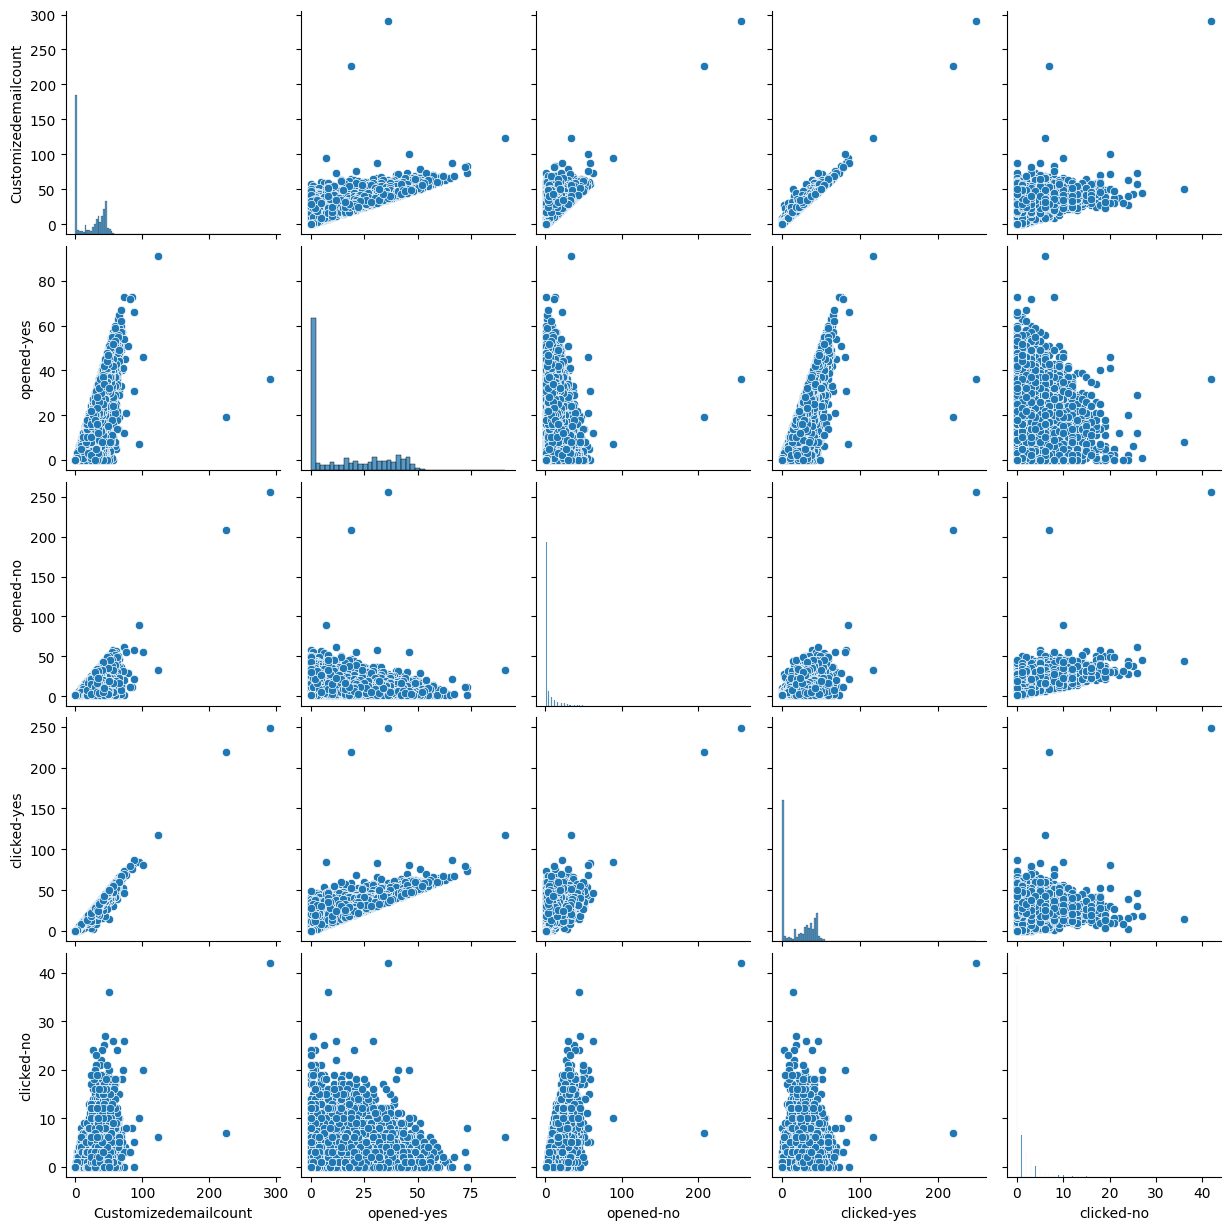

In [1482]:
# scatterplots 
sns.pairplot(email_data)

In [1483]:
data=pd.merge(data4,email_data,how='outer')
data

CustomerID   City  OnlineCommunication  AutomaticRefill  \
0         C16368  CITY2                    0                0   
1         C20345  CITY2                    1                1   
2         C17683  CITY2                    0                0   
3         C18647  CITY4                    0                0   
4         C36692  CITY2                    1                1   
...          ...    ...                  ...              ...   
23815     C23511  CITY2                    1                1   
23816     C12197  CITY3                    1                0   
23817     C40967  CITY3                    1                0   
23818     C36140  CITY3                    1                1   
23819     C42003  CITY4                    1                0   

       DoorstepDelivery PreferredDeliveryDay RetentionPotential  \
0                     0               Monday               High   
1                     1               Friday                Low   
2                     0            Wednesday             Medium   
3                     0               Monday                Low   
4                     0               Friday                Low   
...                 ...                  ...                ...   
23815                 0               Friday                Low   
23816                 1               Friday                Low   
23817                 0             Saturday                Low   
23818                 0             Saturday                Low   
23819                 0               Friday                Low   

       RetentionPotential_num  OrderQuantity  no_of_order  ...  \
0                           0             15            1  ...   
1                           2          15614          186  ...   
2                           1            443           13  ...   
3                           2            748            7  ...   
4                           2           2350           34  ...   
...                       ...            ...          ...  ...   
23815                       2             41            1  ...   
23816                       2             56            1  ...   
23817                       2             35            1  ...   
23818                       2            100            2  ...   
23819                       2             41            1  ...   

       DaysSinceRegistration  DaysSinceLastOrder  Days b/w F&L  \
0                       3850                3533             0   
1                       4499                3372          1024   
2                       4576                4300           217   
3                       4521                3728           791   
4                       4879                3375           848   
...                      ...                 ...           ...   
23815                   1913                1913             0   
23816                   1913                1913             0   
23817                   1913                1913             0   
23818                   1913                1909             4   
23819                   1913                1913             0   

       Customizedemailcount  firstemail  lastemail  opened-yes  opened-no  \
0                        29  2012-09-28 2013-07-25           0         30   
1                        95  2010-12-19 2013-12-19           7         89   
2                         0  2010-10-03 2010-10-03           0          1   
3                        30  2010-11-27 2012-12-17           3         28   
4                        64  2009-12-04 2014-01-16          46         19   
...                     ...         ...        ...         ...        ...   
23815                     0  2018-01-17 2018-01-17           0          1   
23816                     0  2018-01-17 2018-01-17           0          1   
23817                     0  2018-01-17 2018-01-17           0          1   
23818                     8  2018-01-17 2018-01-21           2  

## Dataprep Report

DataPrep Report
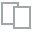
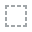
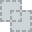
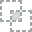
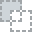
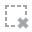
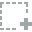
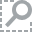
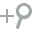
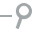
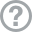
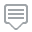
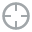
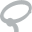
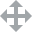
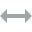
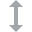
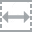
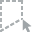
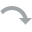
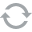
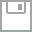
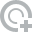
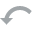
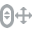
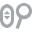
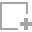
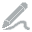
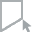
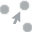
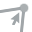
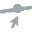

In [1484]:
# Generate the EDA report
report = create_report(data)

# Save the report to an HTML file
report


# Preprocessing

In [ ]:
data=data.drop(['RetentionPotential_num'],axis=1)

In [ ]:
encoder=LabelEncoder()
data['PreferredDeliveryDay']=encoder.fit_transform(data['PreferredDeliveryDay'])
data['retained']=encoder.fit_transform(data['retained'])
data['City']=encoder.fit_transform(data['City'])

In [ ]:
encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
data['Retention Potential Encoded'] = encoder.fit_transform(data[['RetentionPotential']])


In [ ]:
data

CustomerID  City  OnlineCommunication  AutomaticRefill  \
0         C16368     1                    0                0   
1         C20345     1                    1                1   
2         C17683     1                    0                0   
3         C18647     3                    0                0   
4         C36692     1                    1                1   
...          ...   ...                  ...              ...   
23815     C23511     1                    1                1   
23816     C12197     2                    1                0   
23817     C40967     2                    1                0   
23818     C36140     2                    1                1   
23819     C42003     3                    1                0   

       DoorstepDelivery  PreferredDeliveryDay RetentionPotential  \
0                     0                     1               High   
1                     1                     0                Low   
2                     0                     6             Medium   
3                     0                     1                Low   
4                     0                     0                Low   
...                 ...                   ...                ...   
23815                 0                     0                Low   
23816                 1                     0                Low   
23817                 0                     2                Low   
23818                 0                     2                Low   
23819                 0                     0                Low   

       OrderQuantity  no_of_order  retention_rate_2008  ...  \
0                 15            1                  0.0  ...   
1              15614          186                  0.0  ...   
2                443           13                  0.0  ...   
3                748            7                  0.0  ...   
4               2350           34                  0.0  ...   
...              ...          ...                  ...  ...   
23815             41            1                  0.0  ...   
23816             56            1                  0.0  ...   
23817             35            1                  0.0  ...   
23818            100            2                  0.0  ...   
23819             41            1                  0.0  ...   

       DaysSinceLastOrder  Days b/w F&L  Customizedemailcount  firstemail  \
0                    3533             0                    29  2012-09-28   
1                    3372          1024                    95  2010-12-19   
2                    4300           217                     0  2010-10-03   
3                    3728           791                    30  2010-11-27   
4                    3375           848                    64  2009-12-04   
...                   ...           ...                   ...         ...   
23815                1913             0                     0  2018-01-17   
23816                1913             0                     0  2018-01-17   
23817                1913             0                     0  2018-01-17   
23818                1909             4                     8  2018-01-17   
23819                1913             0                     0  2018-01-17   

       lastemail  opened-yes  opened-no  clicked-yes  clicked-no  \
0     2013-07-25           0         30           28           1   
1     2013-12-19           7         89           85          10   
2     2010-10-03           0          1            0           0   
3     2012-12-17           3         28           26           4   
4     2014-01-16          46         19           54          10   
...          ...         ...        ...          ...         ...   
23815 2018-01-17           0          1            0           0   
23816 2018-01-17           0          1            0           0   
23817 2018-01-17           0          1            0           0   
23818 2018-01-21           2          7            5      

In [ ]:
data['DaysSincelastEmail']=(current_date - data['lastemail']).dt.days

In [ ]:
data['diff b\w firstmail and order']= (transactiondata['DateofOrder'] - data['firstemail']).dt.days
data.head()

CustomerID  City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0     C16368     1                    0                0                 0   
1     C20345     1                    1                1                 1   
2     C17683     1                    0                0                 0   
3     C18647     3                    0                0                 0   
4     C36692     1                    1                1                 0   

   PreferredDeliveryDay RetentionPotential  OrderQuantity  no_of_order  \
0                     1               High             15            1   
1                     0                Low          15614          186   
2                     6             Medium            443           13   
3                     1                Low            748            7   
4                     0                Low           2350           34   

   retention_rate_2008  ...  Customizedemailcount  firstemail  lastemail  \
0                  0.0  ...                    29  2012-09-28 2013-07-25   
1                  0.0  ...                    95  2010-12-19 2013-12-19   
2                  0.0  ...                     0  2010-10-03 2010-10-03   
3                  0.0  ...                    30  2010-11-27 2012-12-17   
4                  0.0  ...                    64  2009-12-04 2014-01-16   

   opened-yes  opened-no  clicked-yes  clicked-no  \
0           0         30           28           1   
1           7         89           85          10   
2           0          1            0           0   
3           3         28           26           4   
4          46         19           54          10   

   Retention Potential Encoded  DaysSincelastEmail  \
0                          2.0                3550   
1                          0.0                3403   
2                          1.0                4576   
3                          0.0                3770   
4                          0.0                3375   

   diff b\w firstmail and order  
0                           370  
1                          1082  
2                          1073  
3                          1060  
4                          1498  

[5 rows x 35 columns]

In [ ]:
data=data.drop(['firstemail','lastemail'],axis=1)

In [ ]:
corrr=data.corr().abs()
corrr

City  OnlineCommunication  AutomaticRefill  \
City                          1.000000             0.044251         0.049538   
OnlineCommunication           0.044251             1.000000         0.176233   
AutomaticRefill               0.049538             0.176233         1.000000   
DoorstepDelivery              0.020502             0.097039         0.185477   
PreferredDeliveryDay          0.047617             0.046521         0.038464   
OrderQuantity                 0.066568             0.065848         0.050431   
no_of_order                   0.065940             0.071282         0.073452   
retention_rate_2008           0.021918             0.034544         0.008033   
retention_rate_2009           0.088388             0.116955         0.026976   
retention_rate_2010           0.121409             0.224432         0.052723   
retention_rate_2011           0.033890             0.414231         0.105424   
retention_rate_2012           0.028916             0.280307         0.085075   
retention_rate_2013           0.056244             0.391135         0.064116   
retention_rate_2014           0.052560             0.113947         0.141116   
retention_rate_2015           0.019469             0.196034         0.052874   
retention_rate_2016           0.008101             0.144453         0.046461   
retention_rate_2017           0.021010             0.145559         0.006369   
retention_rate_2018           0.010046             0.080538         0.067843   
retained                      0.075659             0.102146         0.006729   
days b/w R&F                  0.053670             0.243754         0.016852   
DaysSinceRegistration         0.073669             0.408492         0.088651   
DaysSinceLastOrder            0.037427             0.317616         0.086685   
Days b/w F&L                  0.096046             0.226190         0.015294   
Customizedemailcount          0.042451             0.140738         0.010611   
opened-yes                    0.033872             0.174986         0.039579   
opened-no                     0.031323             0.023039         0.105075   
clicked-yes                   0.039553             0.157815         0.008468   
clicked-no                    0.038960             0.086092         0.157804   
Retention Potential Encoded   0.006511             0.167439         0.131405   
DaysSincelastEmail            0.046492             0.334670         0.091982   
diff b\w firstmail and order  0.060008             0.297095         0.064103   

                              DoorstepDelivery  PreferredDeliveryDay  \
City                                  0.020502              0.047617   
OnlineCommunication                   0.097039              0.046521   
AutomaticRefill                       0.185477              0.038464   
DoorstepDelivery                      1.000000              0.041438   
PreferredDeliveryDay                  0.041438              1.000000   
OrderQuantity                         0.095646              0.019227   
no_of_order                           0.084710              0.014916   
retention_rate_2008                   0.004910              0.008036   
retention_rate_2009                   0.016254              0.020514   
retention_rate_2010                   0.032266              0.021374   
retention_rate_2011                   0.067014              0.027539   
retention_rate_2012                   0.053939              0.020551   
retention_rate_2013                   0.018000              0.015013   
retention_rate_2014                   0.127814              0.031186   
retention_rate_2015                   0.031694              0.016138   
retention_rate_2016                   0.029254              0.014092   
retention_rate_2017                   0.002982              0.008355   
retention_rate_2018                   0.076454              0.010905   
retained                              0.004637              0.015016   
days b/w R&F                     

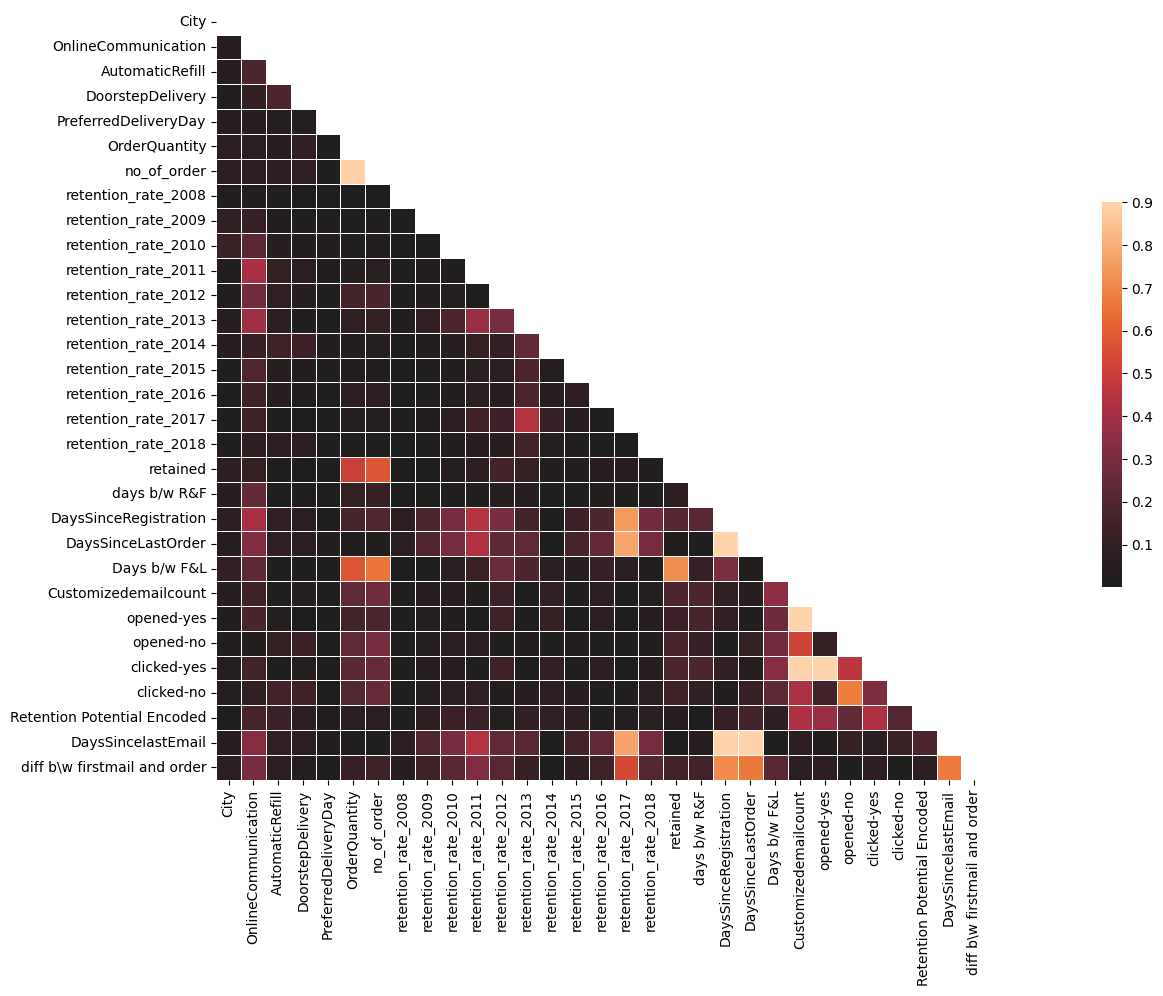

In [ ]:
# Heatmap for understanding the correlation between the variables.
mask = np.triu(np.ones_like(corrr, dtype=bool))
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(corrr, mask=mask,vmax=.9, center=0,
            square=True, linewidths=.60, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
data.dtypes

CustomerID                       object
City                              int64
OnlineCommunication               int64
AutomaticRefill                   int64
DoorstepDelivery                  int64
PreferredDeliveryDay              int64
RetentionPotential               object
OrderQuantity                     int64
no_of_order                       int64
retention_rate_2008             float64
retention_rate_2009             float64
retention_rate_2010             float64
retention_rate_2011             float64
retention_rate_2012             float64
retention_rate_2013             float64
retention_rate_2014             float64
retention_rate_2015             float64
retention_rate_2016             float64
retention_rate_2017             float64
retention_rate_2018             float64
retained                          int64
days b/w R&F                      int64
DaysSinceRegistration             int64
DaysSinceLastOrder                int64
Days b/w F&L                      int64


In [ ]:
plotcols=['RetentionPotential','OrderQuantity','days b/w R&F','DaysSinceRegistration','DaysSinceLastOrder','Days b/w F&L','Customizedemailcount','opened-yes','opened-no','clicked-yes','clicked-no','DaysSincelastEmail','diff b\w firstmail and order']

In [ ]:
train=data.drop(['RetentionPotential','CustomerID'],axis=1)

In [ ]:
to_scale=['OrderQuantity','days b/w R&F','DaysSinceRegistration','DaysSinceLastOrder','Days b/w F&L','Customizedemailcount','DaysSincelastEmail','diff b\w firstmail and order']

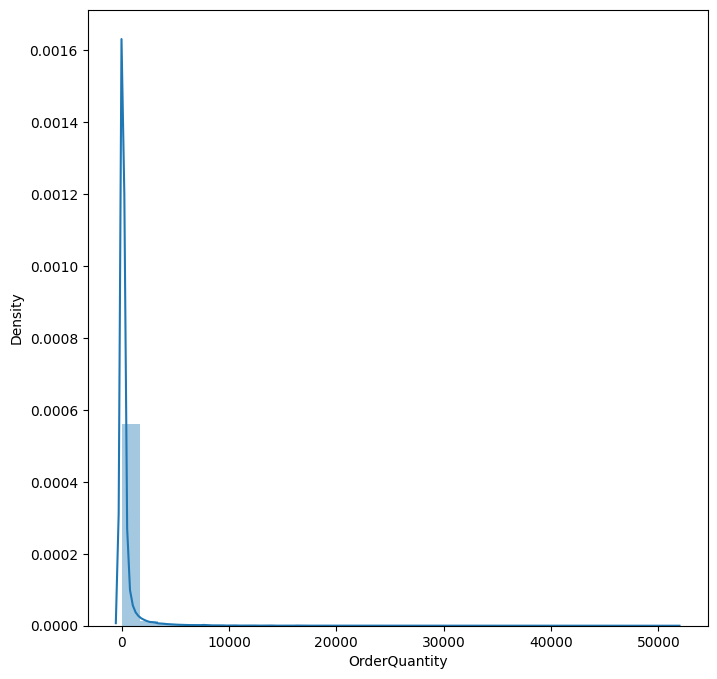

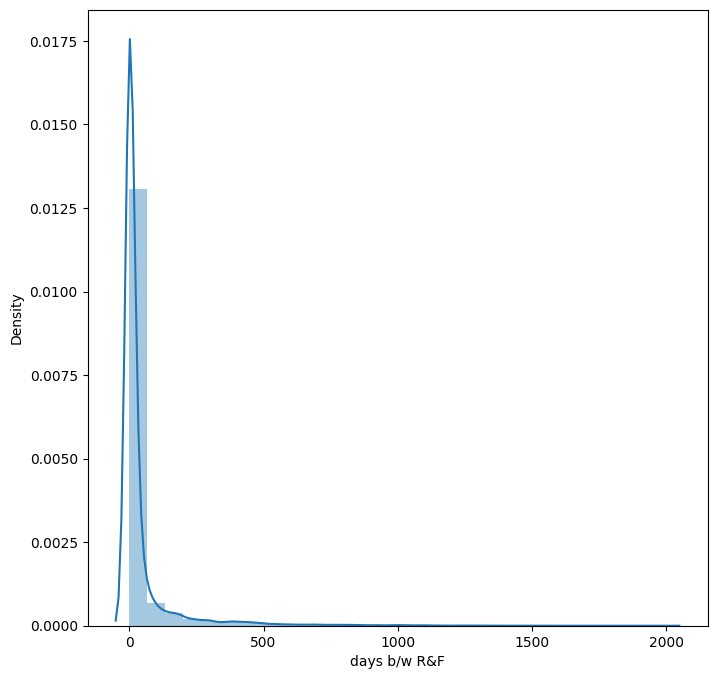

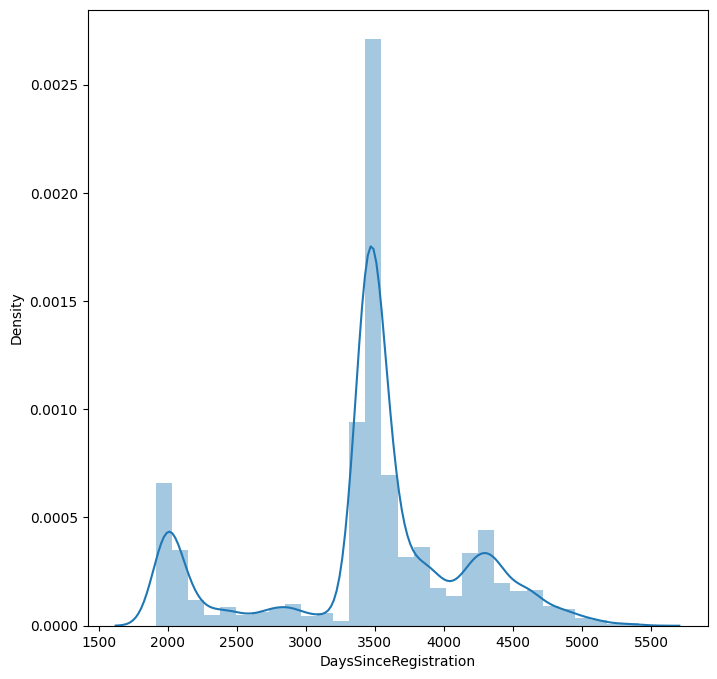

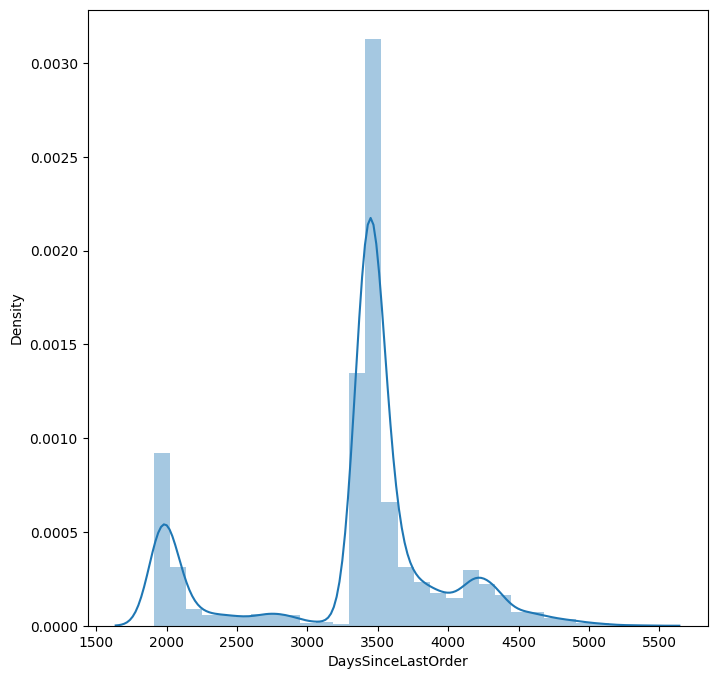

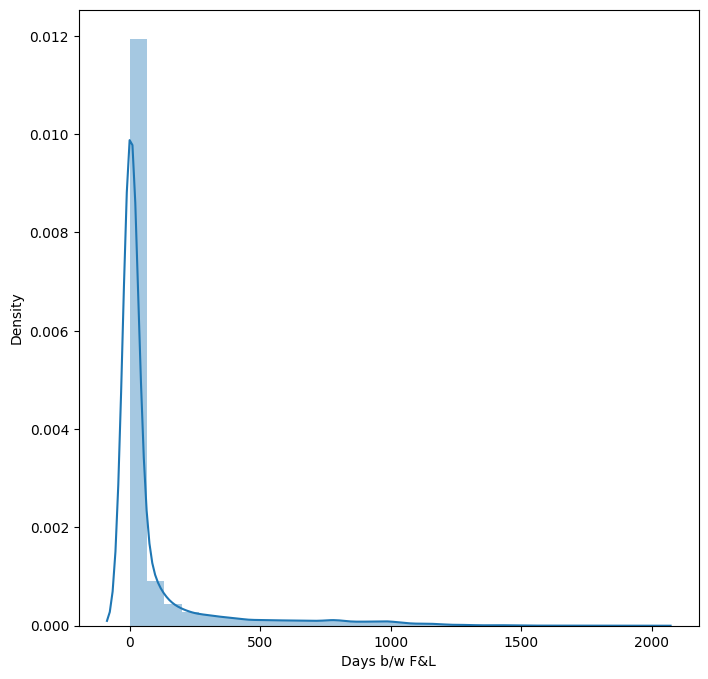

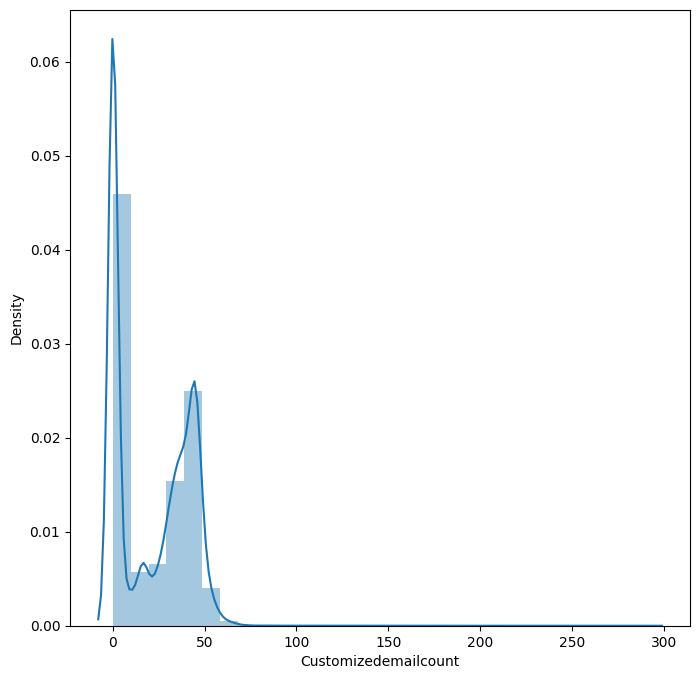

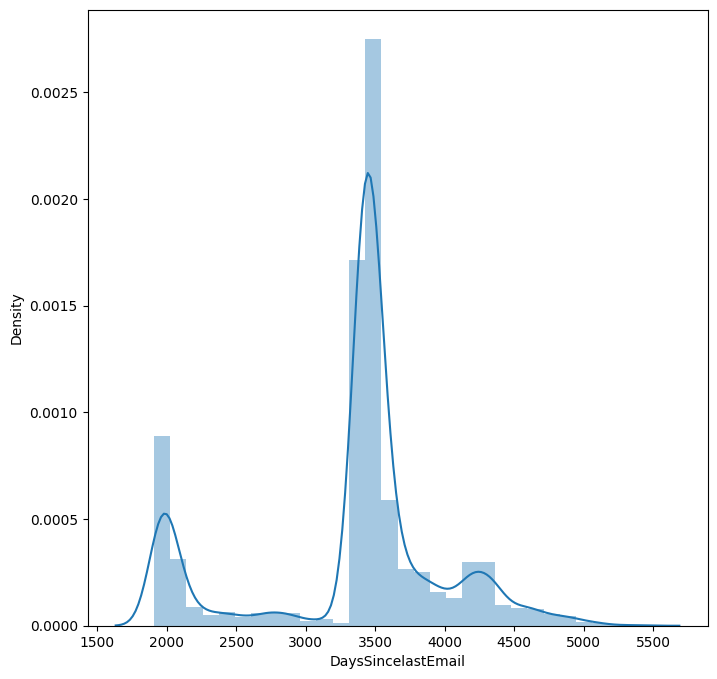

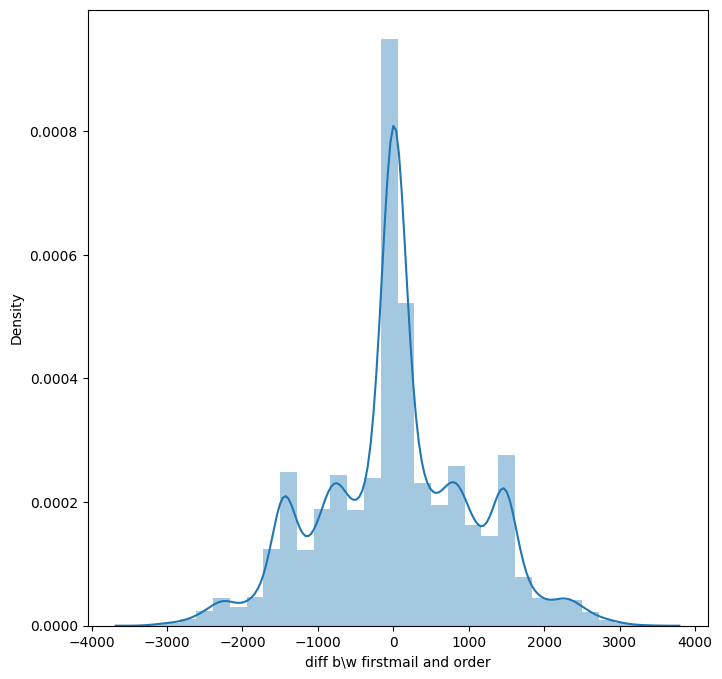

In [ ]:
# distplot representing the distribution of the data. We can observe that there is skewness in the data
for col in to_scale:
    plt.figure(figsize = (8, 8))
    sns.distplot(train[col],bins=30)
    plt.show()

In [ ]:
scaler=StandardScaler()
train[['OrderQuantity','retention_rate_2008','retention_rate_2009','retention_rate_2010',
       'retention_rate_2011','retention_rate_2012','retention_rate_2013',
       'retention_rate_2014','retention_rate_2015','retention_rate_2016',
       'retention_rate_2017','retention_rate_2018','opened-yes','opened-no',
       'clicked-yes','clicked-no','days b/w R&F','DaysSinceRegistration','DaysSinceLastOrder','Days b/w F&L','Customizedemailcount','DaysSincelastEmail','diff b\w firstmail and order']]=scaler.fit_transform(train[['OrderQuantity','retention_rate_2008','retention_rate_2009','retention_rate_2010',
                                                                                                                                                                                                                                        'retention_rate_2011','retention_rate_2012','retention_rate_2013',
                                                                                                                                                                                                                                        'retention_rate_2014','retention_rate_2015','retention_rate_2016',
                                                                                                                                                                                                                                        'retention_rate_2017','retention_rate_2018','opened-yes','opened-no',
                                                                                                                                                                                                                                        'clicked-yes','clicked-no','days b/w R&F','DaysSinceRegistration','DaysSinceLastOrder','Days b/w F&L','Customizedemailcount','DaysSincelastEmail','diff b\w firstmail and order']])

In [ ]:
train

City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0         1                    0                0                 0   
1         1                    1                1                 1   
2         1                    0                0                 0   
3         3                    0                0                 0   
4         1                    1                1                 0   
...     ...                  ...              ...               ...   
23815     1                    1                1                 0   
23816     2                    1                0                 1   
23817     2                    1                0                 0   
23818     2                    1                1                 0   
23819     3                    1                0                 0   

       PreferredDeliveryDay  OrderQuantity  no_of_order  retention_rate_2008  \
0                         1      -0.256527            1            -0.024834   
1                         0      11.422679          186            -0.024834   
2                         6       0.063923           13            -0.024834   
3                         1       0.292281            7            -0.024834   
4                         0       1.491723           34            -0.024834   
...                     ...            ...          ...                  ...   
23815                     0      -0.237060            1            -0.024834   
23816                     0      -0.225830            1            -0.024834   
23817                     2      -0.241553            1            -0.024834   
23818                     2      -0.192886            2            -0.024834   
23819                     0      -0.237060            1            -0.024834   

       retention_rate_2009  retention_rate_2010  ...  DaysSinceLastOrder  \
0                -0.085998            -0.171495  ...            0.292479   
1                -0.085998            -0.171495  ...            0.054142   
2                -0.085998             0.892843  ...            1.427907   
3                -0.085998             0.816819  ...            0.581147   
4                -0.085998            -0.171495  ...            0.058583   
...                    ...                  ...  ...                 ...   
23815            -0.085998            -0.171495  ...           -2.105687   
23816            -0.085998            -0.171495  ...           -2.105687   
23817            -0.085998            -0.171495  ...           -2.105687   
23818            -0.085998            -0.171495  ...           -2.111609   
23819            -0.085998            -0.171495  ...           -2.105687   

       Days b/w F&L  Customizedemailcount  opened-yes  opened-no  clicked-yes  \
0         -0.394164              0.412539   -0.900571   2.793470     0.440121   
1          4.248318              3.705932   -0.494523   9.720608     3.413857   
2          0.589643             -1.034557   -0.900571  -0.611395    -1.020662   
3          3.191972              0.462439   -0.726551   2.558651     0.335779   
4          3.450391              2.159035    1.767740   1.501969     1.796562   
...             ...                   ...         ...        ...          ...   
23815     -0.394164             -1.034557   -0.900571  -0.611395    -1.020662   
23816     -0.394164             -1.034557   -0.900571  -0.611395    -1.020662   
23817     -0.394164             -1.034557   -0.900571  -0.611395    -1.020662   
23818     -0.376029             -0.635358   -0.784557   0.093060    -0.759808   
23819     -0.394164             -1.034557   -0.900571  -0.611395    -1.020662   

       clicked-no  Retention Potential Encoded  DaysSincelastEmail  \
0       -0.071047                          2.0            0.284304   
1        3.716813                          0.0            0.070451   
2       -0.491920                          1.0            1.776915   
3        1.191573          

# Customer Segmentation

In [ ]:
from sklearn.cluster import KMeans

# Fit K-Means clustering model to the train dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

segments = kmeans.predict(X_test)
# Add the predicted segments to the test dataset
X_test['Segment'] = segments


In [ ]:
segments = kmeans.predict(X_train)
X_train['Segment'] = segments
X_train

City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
20261     2                    1                0                 1   
12488     2                    1                0                 0   
37741     0                    1                1                 0   
15699     2                    1                0                 0   
50035     1                    0                0                 0   
...     ...                  ...              ...               ...   
54343     3                    1                0                 0   
38158     1                    0                0                 0   
860       1                    1                1                 0   
15795     0                    1                0                 0   
56422     1                    0                0                 0   

       PreferredDeliveryDay  OrderQuantity  retention_rate_2008  \
20261                     5      -0.237809            -0.024834   
12488                     4      -0.220589            -0.024834   
37741                     1      -0.232241            -0.024834   
15699                     2      -0.237809            -0.024834   
50035                     4      -0.229104            -0.024834   
...                     ...            ...                  ...   
54343                     4      -0.237060            -0.024834   
38158                     1       0.277259            -0.024834   
860                       5       5.647091            -0.024834   
15795                     4      -0.202619            -0.024834   
56422                     5      -0.196544            -0.024834   

       retention_rate_2009  retention_rate_2010  retention_rate_2011  ...  \
20261            -0.085998            -0.171495            -0.356530  ...   
12488            -0.085998            -0.171495            -0.356530  ...   
37741            -0.085998            -0.171495            -0.356530  ...   
15699            -0.085998            -0.171495            -0.356530  ...   
50035            -0.085998            -0.171495             3.268518  ...   
...                    ...                  ...                  ...  ...   
54343            -0.085998            -0.171495            -0.356530  ...   
38158            -0.085998            -0.171495            -0.356530  ...   
860              -0.085998            -0.171495             0.357495  ...   
15795            -0.085998            -0.171495            -0.356530  ...   
56422            -0.085998            -0.171495            -0.356530  ...   

       DaysSinceLastOrder  Days_F_L  Customizedemailcount  opened-yes  \
20261           -2.059797 -0.394164             -1.034557   -0.900571   
12488            0.194776 -0.330692              0.163040    0.085544   
37741            0.172466 -0.394164             -1.034557   -0.900571   
15699            0.151845 -0.394164             -1.034557   -0.900571   
50035            1.495990 -0.394164             -1.034557   -0.900571   
...                   ...       ...                   ...         ...   
54343            0.250835 -0.394164             -1.034557   -0.900571   
38158           -1.590673  0.799934             -0.869837   -0.778719   
860              0.063024  3.980831              2.109135    1.187673   
15795            0.144444 -0.394164              0.512339    0.549598   
56422            0.303878 -0.315356             -1.034557   -0.900571   

       opened-no  clicked-yes  clicked-no  DaysSincelastEmail  \
20261  -0.611395    -1.020662   -0.491920           -2.052082   
12488   0.210469     0.179267   -0.071047            0.165012   
37741  -0.611395    -1.020662   -0.491920            0.141632   
15699  -0.611395    -1.020662   -0.491920            0.121368   
50035  -0.611395    -1.020662   -0.491920            1.466893   
...          ...          ...         ...                 ...   
54343  -0.611395    -1.020662   -0.491920            0.218649   
38158  -0.470461    -0.8484

In [ ]:
X_test

City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
29253     0                    1                0                 0   
39052     1                    0                0                 0   
10045     3                    1                0                 0   
38718     3                    1                0                 0   
6653      3                    0                0                 0   
...     ...                  ...              ...               ...   
38728     3                    0                0                 0   
25132     1                    0                0                 0   
31621     3                    0                0                 0   
20410     1                    0                0                 0   
43063     3                    1                0                 0   

       PreferredDeliveryDay  OrderQuantity  retention_rate_2008  \
29253                     5       0.070367            -0.024834   
39052                     0       2.379700            -0.024834   
10045                     0      -0.237060            -0.024834   
38718                     5       0.408133            -0.024834   
6653                      0       0.036221            -0.024834   
...                     ...            ...                  ...   
38728                     0       0.193943            -0.024834   
25132                     5       0.873457            -0.024834   
31621                     6       0.185519            -0.024834   
20410                     4      -0.204866            -0.024834   
43063                     6      -0.237060            -0.024834   

       retention_rate_2009  retention_rate_2010  retention_rate_2011  ...  \
29253            -0.085998            -0.171495            -0.356530  ...   
39052            -0.085998            -0.171495             0.429073  ...   
10045            -0.085998            -0.171495            -0.356530  ...   
38718            -0.085998            -0.171495             0.642933  ...   
6653             -0.085998            -0.171495             3.268518  ...   
...                    ...                  ...                  ...  ...   
38728            -0.085998            -0.171495            -0.356530  ...   
25132            -0.085998            -0.171495             0.628278  ...   
31621            -0.085998            -0.171495             3.268518  ...   
20410            -0.085998            -0.171495            -0.356530  ...   
43063            -0.085998            -0.171495            -0.356530  ...   

       DaysSinceLastOrder  Days_F_L  Customizedemailcount  opened-yes  \
29253            0.214954 -0.026102             -0.516188   -0.378285   
39052            0.078206  3.789423             -0.934758   -0.878108   
10045            0.245107 -0.394164             -1.034557   -0.900571   
38718            0.721383  1.283012             -1.034557   -0.900571   
6653             1.208815 -0.298957             -0.236159    0.027537   
...                   ...       ...                   ...         ...   
38728            0.065762  0.239623             -0.238651   -0.285671   
25132            0.152027  3.416005             -0.910040   -0.755823   
31621            1.312225  0.234190             -1.034557   -0.900571   
20410           -0.321866 -0.366962             -1.034557   -0.900571   
43063            0.247404 -0.394164             -1.034557   -0.900571   

       opened-no  clicked-yes  clicked-no  DaysSincelastEmail  \
29253  -0.448863    -0.498752   -0.330171            0.189543   
39052  -0.422042    -0.916321   -0.491920            0.289514   
10045  -0.611395    -1.020662   -0.491920            0.213020   
38718  -0.611395    -1.020662   -0.491920            1.321926   
6653   -0.611395    -0.185929   -0.491920            1.162995   
...          ...          ...         ...                 ...   
38728   0.016695    -0.345047    0.770700            0.042881   
25132  -0.611395    -0.8904

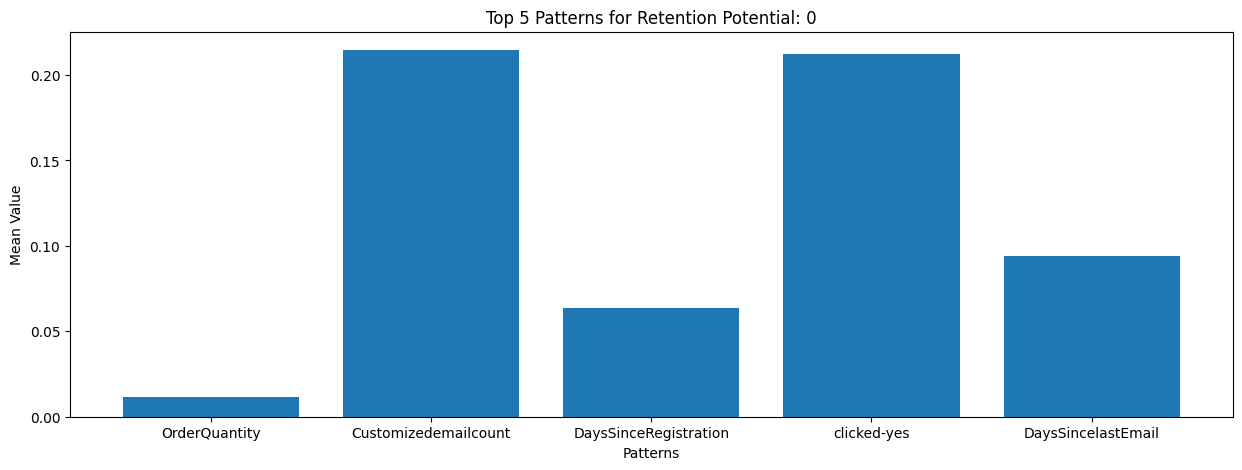

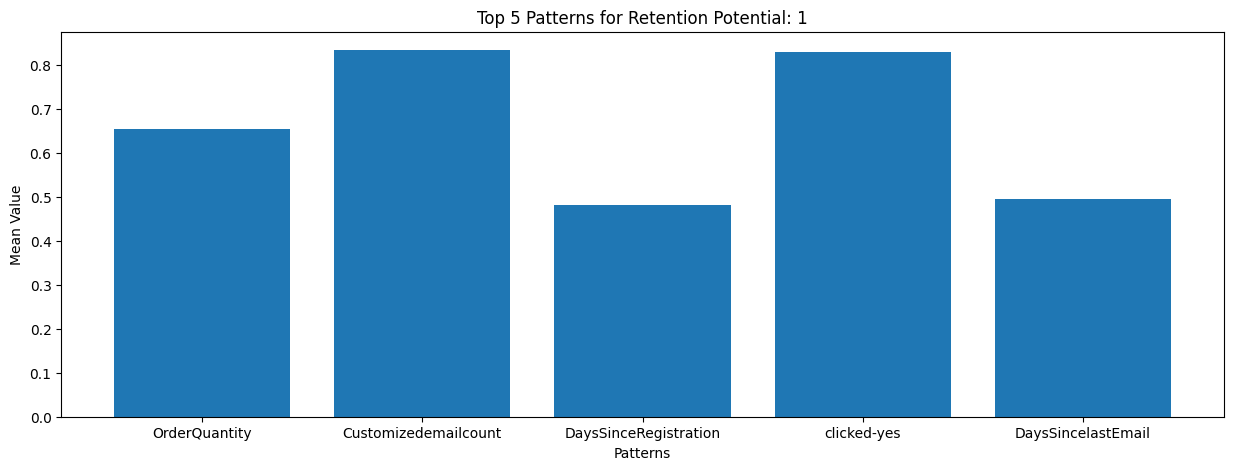

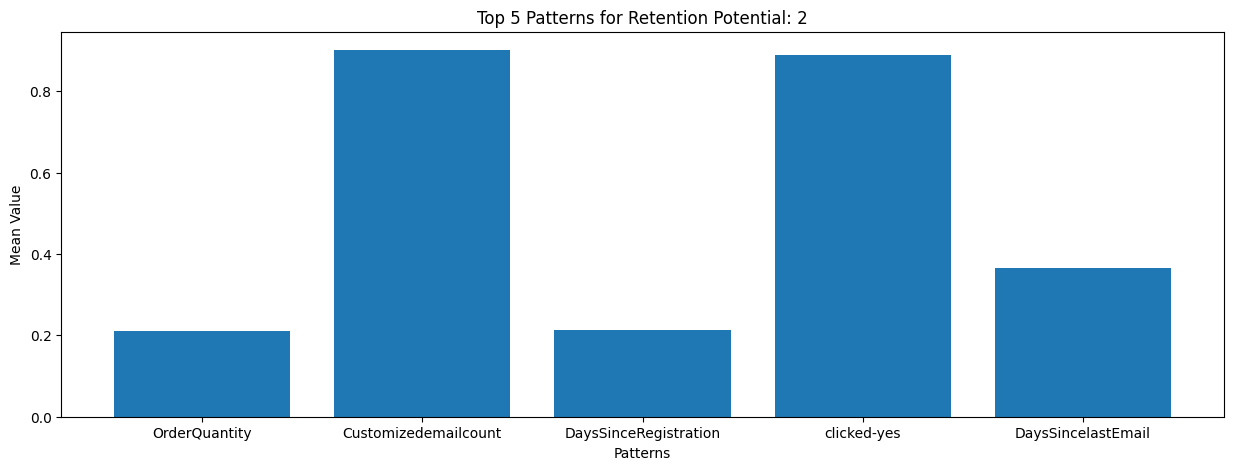

In [ ]:
# Train a Decision Tree classifier on each segment
for segment in [0, 1, 2]:
    # Filter the train dataset by the segment
    segment_mask = X_train['Segment'] == segment
    X_segment_train = X_train[segment_mask]
    y_segment_train = y_train[segment_mask]

    # Train the classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_segment_train, y_segment_train)

    # Extract the top 5 most important features
importances = clf.feature_importances_
indices = importances.argsort()[-5:][::-1]
top_5_patterns = [importance_columns[i] for i in indices]

# Plot the bar chart for each retention potential group
for potential in [0, 1, 2]:
    df = train[train['Retention Potential Encoded'] == potential]
    top_5_patterns_df = df.describe().transpose().sort_values('mean', ascending=False).loc[top_5_patterns].abs()
    
    # Plot the bar chart
    plt.figure(figsize=(15,5))
    plt.bar(top_5_patterns_df.index, top_5_patterns_df['mean'])
    plt.title('Top 5 Patterns for Retention Potential: '+str(potential))
    plt.xlabel("Patterns")
    plt.ylabel("Mean Value")
    
    plt.show()




# Working with Test data

## EDA on customer data

In [ ]:
customerdata=pd.read_excel("//content/drive/MyDrive/DataForPHD/TestData/Customerdata_Test.xlsx")

In [ ]:
customerdata

CustomerID   City DateOfRegistration  OnlineCommunication  \
0        C17838  CITY4         2010-10-22                    0   
1        C12403  CITY2         2008-11-17                    1   
2        C19041  CITY4         2011-01-24                    0   
3        C24069  CITY2         2010-09-18                    0   
4        C26718  CITY2         2010-10-02                    1   
...         ...    ...                ...                  ...   
5950     C32947  CITY2         2018-01-17                    1   
5951     C28951  CITY3         2018-01-17                    1   
5952     C38741  CITY3         2018-01-17                    1   
5953     C20407  CITY2         2018-01-17                    1   
5954     C27220  CITY3         2018-01-17                    1   

      AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  
0                   0                 0             Thursday  
1                   1                 0            Wednesday  
2                   1                 0               Friday  
3                   0                 0            Wednesday  
4                   0                 0               Monday  
...               ...               ...                  ...  
5950                0                 0               Friday  
5951                0                 0               Friday  
5952                0                 0               Monday  
5953                0                 0               Friday  
5954                0                 0               Friday  

[5955 rows x 7 columns]

In [ ]:
customerdata.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
dtype: int64

In [ ]:
customerdata.duplicated().sum()

0

In [ ]:
customerdata.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

## Feature engineering on transaction data

In [ ]:
transaction_data=pd.read_excel("/content/drive/MyDrive/DataForPHD/TestData/transactionsdata_Test.xlsx")
transaction_data.columns=['CustomerID','DateofOrder','timestamp_of_order','OrderQuantity']
transaction_data

CustomerID DateofOrder timestamp_of_order  OrderQuantity
0         C17838  2011-03-28           17:41:08             55
1         C12403  2010-10-12           15:58:02            174
2         C12403  2010-11-27           20:13:48            171
3         C12403  2011-12-09           14:34:44            166
4         C12403  2011-03-04           18:20:18            179
...          ...         ...                ...            ...
26763     C32947  2018-01-17           21:35:26             41
26764     C28951  2018-01-17           17:05:50             40
26765     C38741  2018-01-17           18:56:16             36
26766     C20407  2018-01-17           10:24:52             75
26767     C27220  2018-01-17           12:04:10             40

[26768 rows x 4 columns]

In [ ]:
df= customerdata[['CustomerID','DateOfRegistration']]
df

CustomerID DateOfRegistration
0        C17838         2010-10-22
1        C12403         2008-11-17
2        C19041         2011-01-24
3        C24069         2010-09-18
4        C26718         2010-10-02
...         ...                ...
5950     C32947         2018-01-17
5951     C28951         2018-01-17
5952     C38741         2018-01-17
5953     C20407         2018-01-17
5954     C27220         2018-01-17

[5955 rows x 2 columns]

In [ ]:
df = pd.merge(transaction_data, df, on='CustomerID', how='left')
df

CustomerID DateofOrder timestamp_of_order  OrderQuantity  \
0         C17838  2011-03-28           17:41:08             55   
1         C12403  2010-10-12           15:58:02            174   
2         C12403  2010-11-27           20:13:48            171   
3         C12403  2011-12-09           14:34:44            166   
4         C12403  2011-03-04           18:20:18            179   
...          ...         ...                ...            ...   
26763     C32947  2018-01-17           21:35:26             41   
26764     C28951  2018-01-17           17:05:50             40   
26765     C38741  2018-01-17           18:56:16             36   
26766     C20407  2018-01-17           10:24:52             75   
26767     C27220  2018-01-17           12:04:10             40   

      DateOfRegistration  
0             2010-10-22  
1             2008-11-17  
2             2008-11-17  
3             2008-11-17  
4             2008-11-17  
...                  ...  
26763         2018-01-17  
26764         2018-01-17  
26765         2018-01-17  
26766         2018-01-17  
26767         2018-01-17  

[26768 rows x 5 columns]

In [ ]:
df['DateofOrder'] = pd.to_datetime(df['DateofOrder'])

# start and end years for the loop
start_year = df['DateOfRegistration'].min().year
end_year = 2018

for year in range(start_year, end_year+1):
    # start and end dates for the time period
    start_date = pd.Timestamp(year=year, month=1, day=1)
    end_date = pd.Timestamp(year=year, month=12, day=31)
    
    df_period = df[df['DateofOrder'].between(start_date, end_date)]
    
    # Count the number of unique customers who made at least one order during the time period
    num_customers_period = df_period['CustomerID'].nunique()
    
    # Count the number of unique customers in the entire dataset
    num_customers_total = df['CustomerID'].nunique()
    
    # Calculate retention rate
    retention_rate = (num_customers_period / num_customers_total) * 100
    
    # Print the retention rate for the time period
    print(f"Customer retention rate for the period between {start_date.date()} and {end_date.date()}: {retention_rate:.2f}%")


Customer retention rate for the period between 2008-01-01 and 2008-12-31: 0.12%
Customer retention rate for the period between 2009-01-01 and 2009-12-31: 0.97%
Customer retention rate for the period between 2010-01-01 and 2010-12-31: 3.93%
Customer retention rate for the period between 2011-01-01 and 2011-12-31: 13.03%
Customer retention rate for the period between 2012-01-01 and 2012-12-31: 12.81%
Customer retention rate for the period between 2013-01-01 and 2013-12-31: 58.27%
Customer retention rate for the period between 2014-01-01 and 2014-12-31: 11.82%
Customer retention rate for the period between 2015-01-01 and 2015-12-31: 3.54%
Customer retention rate for the period between 2016-01-01 and 2016-12-31: 3.07%
Customer retention rate for the period between 2017-01-01 and 2017-12-31: 14.51%
Customer retention rate for the period between 2018-01-01 and 2018-12-31: 2.75%


In [ ]:
df['DateOfRegistration'] = pd.to_datetime(df['DateOfRegistration'])
df['DateofOrder'] = pd.to_datetime(df['DateofOrder'])

# start and end years for the loop
start_year = df['DateOfRegistration'].min().year
end_year = 2018

# Initializing an empty DataFrame to store the retention rates
retention_df = pd.DataFrame()

# Loop over each year and calculate the retention rate for each customer
for year in range(start_year, end_year+1):
    start_date = pd.Timestamp(year=year, month=1, day=1)
    end_date = pd.Timestamp(year=year, month=12, day=31)
    
    df_period = df[df['DateofOrder'].between(start_date, end_date)]
    
    # Group orders by customer ID
    customer_groups = df_period.groupby('CustomerID')
    
    # Calculating the retention rate for each customer
    retention_rates = customer_groups.size().div(df.groupby('CustomerID').size(), fill_value=0)
    retention_rates *= 100
    
    # Adding the retention rates to the retention DataFrame
    retention_df[f"retention_rate_{year}"] = retention_rates
    
# Joining the retention DataFrame back to the original DataFrame based on the customer ID
df = df.merge(retention_df, left_on='CustomerID', right_index=True)

# Defining a threshold for retention rate
retention_threshold = 50

# Adding a new column to the DataFrame indicating whether a customer was retained or not
df['retained'] = df[[f"retention_rate_{year}" for year in range(start_year, end_year+1)]].ge(retention_threshold).any(axis=1)


df


CustomerID DateofOrder timestamp_of_order  OrderQuantity  \
0         C17838  2011-03-28           17:41:08             55   
1         C12403  2010-10-12           15:58:02            174   
2         C12403  2010-11-27           20:13:48            171   
3         C12403  2011-12-09           14:34:44            166   
4         C12403  2011-03-04           18:20:18            179   
...          ...         ...                ...            ...   
26763     C32947  2018-01-17           21:35:26             41   
26764     C28951  2018-01-17           17:05:50             40   
26765     C38741  2018-01-17           18:56:16             36   
26766     C20407  2018-01-17           10:24:52             75   
26767     C27220  2018-01-17           12:04:10             40   

      DateOfRegistration  retention_rate_2008  retention_rate_2009  \
0             2010-10-22                  0.0                  0.0   
1             2008-11-17                  0.0                  0.0   
2             2008-11-17                  0.0                  0.0   
3             2008-11-17                  0.0                  0.0   
4             2008-11-17                  0.0                  0.0   
...                  ...                  ...                  ...   
26763         2018-01-17                  0.0                  0.0   
26764         2018-01-17                  0.0                  0.0   
26765         2018-01-17                  0.0                  0.0   
26766         2018-01-17                  0.0                  0.0   
26767         2018-01-17                  0.0                  0.0   

       retention_rate_2010  retention_rate_2011  retention_rate_2012  \
0                 0.000000            100.00000             0.000000   
1                 7.142857             34.52381            30.357143   
2                 7.142857             34.52381            30.357143   
3                 7.142857             34.52381            30.357143   
4                 7.142857             34.52381            30.357143   
...                    ...                  ...                  ...   
26763             0.000000              0.00000             0.000000   
26764             0.000000              0.00000             0.000000   
26765             0.000000              0.00000             0.000000   
26766             0.000000              0.00000             0.000000   
26767             0.000000              0.00000             0.000000   

       retention_rate_2013  retention_rate_2014  retention_rate_2015  \
0                 0.000000             0.000000                  0.0   
1                26.190476             1.785714                  0.0   
2                26.190476             1.785714                  0.0   
3                26.190476             1.785714                  0.0   
4                26.190476             1.785714                  0.0   
...                    ...                  ...                  ...   
26763             0.000000             0.000000                  0.0   
26764             0.000000             0.000000                  0.0   
26765             0.000000             0.000000                  0.0   
26766             0.000000             0.000000                  0.0   
26767             0.000000             0.000000                  0.0   

       retention_rate_2016  retention_rate_2017  retention_rate_2018  retained  
0                      0.0                  0.0                  0.0      True  
1                      0.0                  0.0                  0.0     False  
2                      0.0                  0.0                  0.0     False  
3                      0.0                  0.0                  0.0     False  
4                      0.0                  0.0                  0.0     False  
...                    ...                  ...                  ...       ...  
26763                  0.0                  0.0                100.0      T

In [ ]:
transaction_data.duplicated().sum()

0

In [ ]:
transaction_data.nunique()

CustomerID             5955
DateofOrder            2771
timestamp_of_order    15326
OrderQuantity           372
dtype: int64

In [ ]:
transaction_data['DateofOrder'] = pd.to_datetime(transaction_data['DateofOrder'])

In [ ]:
trans=transaction_data.drop(['timestamp_of_order'],axis=1)

In [ ]:
retention_rate = df.groupby('CustomerID').agg({'retention_rate_2008':'min','retention_rate_2009':'min','retention_rate_2010':'min','retention_rate_2011':'min','retention_rate_2012':'min','retention_rate_2013':'min','retention_rate_2014':'min',
                                               'retention_rate_2015':'min','retention_rate_2016':'min','retention_rate_2017':'min','retention_rate_2018':'min','retained':'min'}).reset_index()

In [ ]:
no_of_orders_placed = trans.groupby('CustomerID').agg({'OrderQuantity':'count'}).reset_index()
no_of_orders_placed.columns=['CustomerID','no_of_order']

In [ ]:
no_of_orders_placed.head(5)

CustomerID  no_of_order
0     C12121            1
1     C12132            1
2     C12134            1
3     C12135            1
4     C12136            1

In [ ]:
first_order_dates = trans.groupby('CustomerID')['DateofOrder'].min()
pd.DataFrame(first_order_dates)
first_order_dates = first_order_dates.reset_index()
first_order_dates = first_order_dates.rename(columns={'index': 'CustomerID'})
first_order_dates

CustomerID DateofOrder
0        C12121  2017-12-14
1        C12132  2013-10-20
2        C12134  2013-09-18
3        C12135  2018-01-10
4        C12136  2013-10-19
...         ...         ...
5950     C42153  2012-10-18
5951     C42155  2013-09-14
5952     C42157  2013-09-30
5953     C42167  2016-10-28
5954     C42190  2013-09-06

[5955 rows x 2 columns]

In [ ]:
transactiondata=trans.groupby('CustomerID').agg({'OrderQuantity':'sum','DateofOrder':'min'}).reset_index()
transactiondata

CustomerID  OrderQuantity DateofOrder
0        C12121             52  2017-12-14
1        C12132             40  2013-10-20
2        C12134             40  2013-09-18
3        C12135             41  2018-01-10
4        C12136             79  2013-10-19
...         ...            ...         ...
5950     C42153            379  2012-10-18
5951     C42155             41  2013-09-14
5952     C42157             41  2013-09-30
5953     C42167            502  2016-10-28
5954     C42190             40  2013-09-06

[5955 rows x 3 columns]

In [ ]:
data2=pd.merge(customerdata,transactiondata,how='outer')

In [ ]:
data2

CustomerID   City DateOfRegistration  OnlineCommunication  \
0        C17838  CITY4         2010-10-22                    0   
1        C12403  CITY2         2008-11-17                    1   
2        C19041  CITY4         2011-01-24                    0   
3        C24069  CITY2         2010-09-18                    0   
4        C26718  CITY2         2010-10-02                    1   
...         ...    ...                ...                  ...   
5950     C32947  CITY2         2018-01-17                    1   
5951     C28951  CITY3         2018-01-17                    1   
5952     C38741  CITY3         2018-01-17                    1   
5953     C20407  CITY2         2018-01-17                    1   
5954     C27220  CITY3         2018-01-17                    1   

      AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  OrderQuantity  \
0                   0                 0             Thursday             55   
1                   1                 0            Wednesday          29537   
2                   1                 0               Friday          14321   
3                   0                 0            Wednesday             47   
4                   0                 0               Monday          20238   
...               ...               ...                  ...            ...   
5950                0                 0               Friday             41   
5951                0                 0               Friday             40   
5952                0                 0               Monday             36   
5953                0                 0               Friday             75   
5954                0                 0               Friday             40   

     DateofOrder  
0     2011-03-28  
1     2010-10-12  
2     2011-05-16  
3     2010-11-09  
4     2011-01-25  
...          ...  
5950  2018-01-17  
5951  2018-01-17  
5952  2018-01-17  
5953  2018-01-17  
5954  2018-01-17  

[5955 rows x 9 columns]

In [ ]:
data3=pd.merge(data2,no_of_orders_placed,how='outer')
data3

CustomerID   City DateOfRegistration  OnlineCommunication  \
0        C17838  CITY4         2010-10-22                    0   
1        C12403  CITY2         2008-11-17                    1   
2        C19041  CITY4         2011-01-24                    0   
3        C24069  CITY2         2010-09-18                    0   
4        C26718  CITY2         2010-10-02                    1   
...         ...    ...                ...                  ...   
5950     C32947  CITY2         2018-01-17                    1   
5951     C28951  CITY3         2018-01-17                    1   
5952     C38741  CITY3         2018-01-17                    1   
5953     C20407  CITY2         2018-01-17                    1   
5954     C27220  CITY3         2018-01-17                    1   

      AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  OrderQuantity  \
0                   0                 0             Thursday             55   
1                   1                 0            Wednesday          29537   
2                   1                 0               Friday          14321   
3                   0                 0            Wednesday             47   
4                   0                 0               Monday          20238   
...               ...               ...                  ...            ...   
5950                0                 0               Friday             41   
5951                0                 0               Friday             40   
5952                0                 0               Monday             36   
5953                0                 0               Friday             75   
5954                0                 0               Friday             40   

     DateofOrder  no_of_order  
0     2011-03-28            1  
1     2010-10-12          168  
2     2011-05-16          122  
3     2010-11-09            1  
4     2011-01-25          129  
...          ...          ...  
5950  2018-01-17            1  
5951  2018-01-17            1  
5952  2018-01-17            1  
5953  2018-01-17            1  
5954  2018-01-17            1  

[5955 rows x 10 columns]

In [ ]:
lastorder=trans.groupby('CustomerID').agg({'DateofOrder':'max'}).reset_index()
lastorder.columns=['CustomerID','lastorder']

In [ ]:
data4=pd.merge(data3,lastorder,how='outer')
data4

CustomerID   City DateOfRegistration  OnlineCommunication  \
0        C17838  CITY4         2010-10-22                    0   
1        C12403  CITY2         2008-11-17                    1   
2        C19041  CITY4         2011-01-24                    0   
3        C24069  CITY2         2010-09-18                    0   
4        C26718  CITY2         2010-10-02                    1   
...         ...    ...                ...                  ...   
5950     C32947  CITY2         2018-01-17                    1   
5951     C28951  CITY3         2018-01-17                    1   
5952     C38741  CITY3         2018-01-17                    1   
5953     C20407  CITY2         2018-01-17                    1   
5954     C27220  CITY3         2018-01-17                    1   

      AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  OrderQuantity  \
0                   0                 0             Thursday             55   
1                   1                 0            Wednesday          29537   
2                   1                 0               Friday          14321   
3                   0                 0            Wednesday             47   
4                   0                 0               Monday          20238   
...               ...               ...                  ...            ...   
5950                0                 0               Friday             41   
5951                0                 0               Friday             40   
5952                0                 0               Monday             36   
5953                0                 0               Friday             75   
5954                0                 0               Friday             40   

     DateofOrder  no_of_order  lastorder  
0     2011-03-28            1 2011-03-28  
1     2010-10-12          168 2014-01-14  
2     2011-05-16          122 2014-01-16  
3     2010-11-09            1 2010-11-09  
4     2011-01-25          129 2014-01-12  
...          ...          ...        ...  
5950  2018-01-17            1 2018-01-17  
5951  2018-01-17            1 2018-01-17  
5952  2018-01-17            1 2018-01-17  
5953  2018-01-17            1 2018-01-17  
5954  2018-01-17            1 2018-01-17  

[5955 rows x 11 columns]

In [ ]:
data4=pd.merge(data4,retention_rate,how='outer')
data4

CustomerID   City DateOfRegistration  OnlineCommunication  \
0        C17838  CITY4         2010-10-22                    0   
1        C12403  CITY2         2008-11-17                    1   
2        C19041  CITY4         2011-01-24                    0   
3        C24069  CITY2         2010-09-18                    0   
4        C26718  CITY2         2010-10-02                    1   
...         ...    ...                ...                  ...   
5950     C32947  CITY2         2018-01-17                    1   
5951     C28951  CITY3         2018-01-17                    1   
5952     C38741  CITY3         2018-01-17                    1   
5953     C20407  CITY2         2018-01-17                    1   
5954     C27220  CITY3         2018-01-17                    1   

      AutomaticRefill  DoorstepDelivery PreferredDeliveryDay  OrderQuantity  \
0                   0                 0             Thursday             55   
1                   1                 0            Wednesday          29537   
2                   1                 0               Friday          14321   
3                   0                 0            Wednesday             47   
4                   0                 0               Monday          20238   
...               ...               ...                  ...            ...   
5950                0                 0               Friday             41   
5951                0                 0               Friday             40   
5952                0                 0               Monday             36   
5953                0                 0               Friday             75   
5954                0                 0               Friday             40   

     DateofOrder  no_of_order  ... retention_rate_2010  retention_rate_2011  \
0     2011-03-28            1  ...            0.000000           100.000000   
1     2010-10-12          168  ...            7.142857            34.523810   
2     2011-05-16          122  ...            0.000000            21.311475   
3     2010-11-09            1  ...          100.000000             0.000000   
4     2011-01-25          129  ...            0.000000            32.558140   
...          ...          ...  ...                 ...                  ...   
5950  2018-01-17            1  ...            0.000000             0.000000   
5951  2018-01-17            1  ...            0.000000             0.000000   
5952  2018-01-17            1  ...            0.000000             0.000000   
5953  2018-01-17            1  ...            0.000000             0.000000   
5954  2018-01-17            1  ...            0.000000             0.000000   

      retention_rate_2012  retention_rate_2013  retention_rate_2014  \
0                0.000000             0.000000             0.000000   
1               30.357143            26.190476             1.785714   
2               40.163934            36.885246             1.639344   
3                0.000000             0.000000             0.000000   
4               31.782946            33.333333             2.325581   
...                   ...                  ...                  ...   
5950             0.000000             0.000000             0.000000   
5951             0.000000             0.000000             0.000000   
5952             0.000000             0.000000             0.000000   
5953             0.000000             0.000000             0.000000   
5954             0.000000             0.000000             0.000000   

      retention_rate_2015  retention_rate_2016  retention_rate_2017  \
0                     0.0                  0.0                  0.0   
1                     0.0                  0.0                  0.0   
2                     0.0                  0.0                  0.0   
3                     0.0                  0.0                  0.0   
4                     0.0                  0.0                  0.0   
...                   ...          

In [ ]:
current_date = pd.to_datetime('today').normalize()
data4['days_R_F']= (data4['DateofOrder'] - data4['DateOfRegistration']).dt.days
data4['DaysSinceRegistration']= (current_date - data4['DateOfRegistration']).dt.days
data4['DaysSinceLastOrder'] = (current_date - data4['lastorder']).dt.days
data4['Days_F_L']= (data4['lastorder'] - data4['DateofOrder']).dt.days

In [ ]:
data4.head(1)

CustomerID   City DateOfRegistration  OnlineCommunication  AutomaticRefill  \
0     C17838  CITY4         2010-10-22                    0                0   

   DoorstepDelivery PreferredDeliveryDay  OrderQuantity DateofOrder  \
0                 0             Thursday             55  2011-03-28   

   no_of_order  ... retention_rate_2014  retention_rate_2015  \
0            1  ...                 0.0                  0.0   

   retention_rate_2016  retention_rate_2017  retention_rate_2018  retained  \
0                  0.0                  0.0                  0.0      True   

   days_R_F  DaysSinceRegistration  DaysSinceLastOrder  Days_F_L  
0       157                   4557                4400         0  

[1 rows x 27 columns]

In [ ]:
data4=data4.drop(['DateOfRegistration','DateofOrder','lastorder'],axis=1)

## Feature engineering on email data

In [ ]:
emaildata=pd.read_excel("/content/drive/MyDrive/DataForPHD/TestData/Emaildata_Test.xlsx")
emaildata.columns=['CustomerID','Dateofemail','EmailType','timestamp_of_sent','MailOpened','MailClicked']

In [ ]:
emaildata

CustomerID Dateofemail        EmailType timestamp_of_sent MailOpened  \
0          C17838  2010-10-22     WelcomeEmail          16:59:02        yes   
1          C12403  2008-11-17     WelcomeEmail          12:46:56        yes   
2          C19041  2011-01-24     WelcomeEmail          14:35:22        yes   
3          C24069  2010-09-18     WelcomeEmail          12:25:26        yes   
4          C26718  2010-10-02     WelcomeEmail          11:55:58        yes   
...           ...         ...              ...               ...        ...   
129069     C30169  2018-01-15  CustomizedEmail          13:55:28         no   
129070     C30169  2018-01-15  CustomizedEmail          15:17:34         no   
129071     C30169  2018-01-15  CustomizedEmail          10:24:54        yes   
129072     C30169  2018-01-15  CustomizedEmail          17:15:26        yes   
129073     C30169  2018-01-15  CustomizedEmail          10:10:10        yes   

          MailClicked  
0       NotApplicable  
1       NotApplicable  
2       NotApplicable  
3       NotApplicable  
4       NotApplicable  
...               ...  
129069             no  
129070             no  
129071            yes  
129072             no  
129073             no  

[129074 rows x 6 columns]

In [ ]:
emaildata.nunique()

CustomerID            5955
Dateofemail           3149
EmailType                2
timestamp_of_sent    14366
MailOpened               2
MailClicked              3
dtype: int64

In [ ]:
emaildata['EmailType'].value_counts()

CustomizedEmail    123119
WelcomeEmail         5955
Name: EmailType, dtype: int64

In [ ]:
emaildata['MailClicked'].value_counts()

no               116201
yes                6918
NotApplicable      5955
Name: MailClicked, dtype: int64

In [ ]:
# Calculate the number of emails opened
num_emails_opened = emaildata[emaildata['MailOpened'] == 'yes']['MailOpened'].count()

# Calculate the total number of emails sent
total_emails_sent = emaildata['MailOpened'].count()

# Calculate the open rate as a percentage
open_rate = num_emails_opened / total_emails_sent * 100

# Print the open rate
print(f"Open rate: {open_rate:.2f}%")


Open rate: 28.49%


In [ ]:
grouped=emaildata.groupby(['CustomerID','EmailType']).size().reset_index(name='count')
grouped

CustomerID        EmailType  count
0        C12121  CustomizedEmail     24
1        C12121     WelcomeEmail      1
2        C12132     WelcomeEmail      1
3        C12134     WelcomeEmail      1
4        C12135  CustomizedEmail     29
...         ...              ...    ...
9448     C42155     WelcomeEmail      1
9449     C42157     WelcomeEmail      1
9450     C42167  CustomizedEmail     49
9451     C42167     WelcomeEmail      1
9452     C42190     WelcomeEmail      1

[9453 rows x 3 columns]

In [ ]:
pivot = pd.pivot_table(grouped, index='CustomerID', columns='EmailType', values='count').reset_index()
pivot.columns.name=None

In [ ]:
pivot.columns=['CustomerID','Customizedemailcount','Welcomeemailcount']
pivot

CustomerID  Customizedemailcount  Welcomeemailcount
0        C12121                  24.0                1.0
1        C12132                   NaN                1.0
2        C12134                   NaN                1.0
3        C12135                  29.0                1.0
4        C12136                  41.0                1.0
...         ...                   ...                ...
5950     C42153                  10.0                1.0
5951     C42155                   NaN                1.0
5952     C42157                   NaN                1.0
5953     C42167                  49.0                1.0
5954     C42190                   NaN                1.0

[5955 rows x 3 columns]

In [ ]:
pivot=pivot.drop('Welcomeemailcount',axis=1)

In [ ]:
pivot.fillna(0,inplace=True)

In [ ]:
pivot['Customizedemailcount']=pivot['Customizedemailcount'].astype('int64')

In [ ]:
pivot=pd.DataFrame(pivot)
pivot

CustomerID  Customizedemailcount
0        C12121                    24
1        C12132                     0
2        C12134                     0
3        C12135                    29
4        C12136                    41
...         ...                   ...
5950     C42153                    10
5951     C42155                     0
5952     C42157                     0
5953     C42167                    49
5954     C42190                     0

[5955 rows x 2 columns]

In [ ]:
df=emaildata.drop('timestamp_of_sent',axis=1)

In [ ]:
df.isnull().sum()

CustomerID     0
Dateofemail    0
EmailType      0
MailOpened     0
MailClicked    0
dtype: int64

In [ ]:
df['Dateofemail'] = pd.to_datetime(df['Dateofemail'])

In [ ]:
firstemail=df.groupby('CustomerID').agg({'Dateofemail':'min'}).reset_index()
firstemail.columns=['CustomerID','firstemail']
firstemail

CustomerID firstemail
0        C12121 2017-12-04
1        C12132 2013-10-20
2        C12134 2013-09-18
3        C12135 2017-11-01
4        C12136 2013-09-28
...         ...        ...
5950     C42153 2012-08-28
5951     C42155 2013-09-14
5952     C42157 2013-09-30
5953     C42167 2016-10-28
5954     C42190 2013-09-06

[5955 rows x 2 columns]

In [ ]:
lastemail=df.groupby('CustomerID').agg({'Dateofemail':'max'}).reset_index()
lastemail.columns=['CustomerID','lastemail']
lastemail

CustomerID  lastemail
0        C12121 2017-12-13
1        C12132 2013-10-20
2        C12134 2013-09-18
3        C12135 2018-01-10
4        C12136 2013-10-19
...         ...        ...
5950     C42153 2012-11-08
5951     C42155 2013-09-14
5952     C42157 2013-09-30
5953     C42167 2017-11-04
5954     C42190 2013-09-06

[5955 rows x 2 columns]

In [ ]:
grouped=emaildata.groupby(['CustomerID','MailOpened']).size().reset_index(name='count')
grouped

CustomerID MailOpened  count
0        C12121         no     16
1        C12121        yes      9
2        C12132        yes      1
3        C12134        yes      1
4        C12135         no     21
...         ...        ...    ...
9327     C42155        yes      1
9328     C42157        yes      1
9329     C42167         no     46
9330     C42167        yes      4
9331     C42190        yes      1

[9332 rows x 3 columns]

In [ ]:
pivot_for_mailopened = pd.pivot_table(grouped, index='CustomerID', columns='MailOpened', values='count').reset_index()
pivot_for_mailopened.columns.name=None

In [ ]:
pivot_for_mailopened.columns=['CustomerID','opened-yes','opened-no']
pivot_for_mailopened

CustomerID  opened-yes  opened-no
0        C12121        16.0        9.0
1        C12132         NaN        1.0
2        C12134         NaN        1.0
3        C12135        21.0        9.0
4        C12136        38.0        4.0
...         ...         ...        ...
5950     C42153         8.0        3.0
5951     C42155         NaN        1.0
5952     C42157         NaN        1.0
5953     C42167        46.0        4.0
5954     C42190         NaN        1.0

[5955 rows x 3 columns]

In [ ]:
pivot_for_mailopened['opened-yes']=pivot_for_mailopened['opened-yes'].fillna(0)

In [ ]:
pivot_for_mailopened[['opened-yes','opened-no']]=pivot_for_mailopened[['opened-yes','opened-no']].astype('int64')

In [ ]:
grouped=emaildata.groupby(['CustomerID','MailClicked']).size().reset_index(name='count')
grouped

CustomerID    MailClicked  count
0         C12121  NotApplicable      1
1         C12121             no     21
2         C12121            yes      3
3         C12132  NotApplicable      1
4         C12134  NotApplicable      1
...          ...            ...    ...
11603     C42157  NotApplicable      1
11604     C42167  NotApplicable      1
11605     C42167             no     48
11606     C42167            yes      1
11607     C42190  NotApplicable      1

[11608 rows x 3 columns]

In [ ]:
pivot_for_mailclicked = pd.pivot_table(grouped, index='CustomerID', columns='MailClicked', values='count').reset_index()
pivot_for_mailclicked.columns.name=None

In [ ]:
pivot_for_mailclicked

CustomerID  NotApplicable    no  yes
0        C12121            1.0  21.0  3.0
1        C12132            1.0   NaN  NaN
2        C12134            1.0   NaN  NaN
3        C12135            1.0  24.0  5.0
4        C12136            1.0  40.0  1.0
...         ...            ...   ...  ...
5950     C42153            1.0   9.0  1.0
5951     C42155            1.0   NaN  NaN
5952     C42157            1.0   NaN  NaN
5953     C42167            1.0  48.0  1.0
5954     C42190            1.0   NaN  NaN

[5955 rows x 4 columns]

In [ ]:
pivot_for_mailclicked.columns=['CustomerID','Notapplicable','clicked-yes','clicked-no']
pivot_for_mailclicked.head(1)

CustomerID  Notapplicable  clicked-yes  clicked-no
0     C12121            1.0         21.0         3.0

In [ ]:
pivot_for_mailclicked[['Notapplicable','clicked-yes','clicked-no']]=pivot_for_mailclicked[['Notapplicable','clicked-yes','clicked-no']].fillna(0)

In [ ]:
pivot_for_mailclicked[['Notapplicable','clicked-yes','clicked-no']]=pivot_for_mailclicked[['Notapplicable','clicked-yes','clicked-no']].astype('int64')

In [ ]:
pivot_for_mailclicked2=pivot_for_mailclicked.drop('Notapplicable',axis=1)

In [ ]:
email_data=pd.merge(pivot,firstemail,how='outer')

In [ ]:
email_data=pd.merge(email_data,lastemail,how='outer')

In [ ]:
email_data=pd.merge(email_data,pivot,how='outer')

In [ ]:
email_data=pd.merge(email_data,pivot_for_mailopened,how='outer')

In [ ]:
email_data=pd.merge(email_data,pivot_for_mailclicked2,how='outer')
email_data

CustomerID  Customizedemailcount firstemail  lastemail  opened-yes  \
0        C12121                    24 2017-12-04 2017-12-13          16   
1        C12132                     0 2013-10-20 2013-10-20           0   
2        C12134                     0 2013-09-18 2013-09-18           0   
3        C12135                    29 2017-11-01 2018-01-10          21   
4        C12136                    41 2013-09-28 2013-10-19          38   
...         ...                   ...        ...        ...         ...   
5950     C42153                    10 2012-08-28 2012-11-08           8   
5951     C42155                     0 2013-09-14 2013-09-14           0   
5952     C42157                     0 2013-09-30 2013-09-30           0   
5953     C42167                    49 2016-10-28 2017-11-04          46   
5954     C42190                     0 2013-09-06 2013-09-06           0   

      opened-no  clicked-yes  clicked-no  
0             9           21           3  
1             1            0           0  
2             1            0           0  
3             9           24           5  
4             4           40           1  
...         ...          ...         ...  
5950          3            9           1  
5951          1            0           0  
5952          1            0           0  
5953          4           48           1  
5954          1            0           0  

[5955 rows x 8 columns]

In [ ]:
data=pd.merge(data4,email_data,how='outer')
data

CustomerID   City  OnlineCommunication  AutomaticRefill  \
0        C17838  CITY4                    0                0   
1        C12403  CITY2                    1                1   
2        C19041  CITY4                    0                1   
3        C24069  CITY2                    0                0   
4        C26718  CITY2                    1                0   
...         ...    ...                  ...              ...   
5950     C32947  CITY2                    1                0   
5951     C28951  CITY3                    1                0   
5952     C38741  CITY3                    1                0   
5953     C20407  CITY2                    1                0   
5954     C27220  CITY3                    1                0   

      DoorstepDelivery PreferredDeliveryDay  OrderQuantity  no_of_order  \
0                    0             Thursday             55            1   
1                    0            Wednesday          29537          168   
2                    0               Friday          14321          122   
3                    0            Wednesday             47            1   
4                    0               Monday          20238          129   
...                ...                  ...            ...          ...   
5950                 0               Friday             41            1   
5951                 0               Friday             40            1   
5952                 0               Monday             36            1   
5953                 0               Friday             75            1   
5954                 0               Friday             40            1   

      retention_rate_2008  retention_rate_2009  ...  DaysSinceRegistration  \
0                     0.0                  0.0  ...                   4557   
1                     0.0                  0.0  ...                   5261   
2                     0.0                  0.0  ...                   4463   
3                     0.0                  0.0  ...                   4591   
4                     0.0                  0.0  ...                   4577   
...                   ...                  ...  ...                    ...   
5950                  0.0                  0.0  ...                   1913   
5951                  0.0                  0.0  ...                   1913   
5952                  0.0                  0.0  ...                   1913   
5953                  0.0                  0.0  ...                   1913   
5954                  0.0                  0.0  ...                   1913   

      DaysSinceLastOrder  Days_F_L  Customizedemailcount  firstemail  \
0                   4400         0                     0  2010-10-22   
1                   3377      1190                    46  2008-11-17   
2                   3375       976                    60  2011-01-24   
3                   4539         0                    45  2010-09-18   
4                   3379      1083                    13  2010-10-02   
...                  ...       ...                   ...         ...   
5950                1913         0                     0  2018-01-17   
5951                1913         0                     0  2018-01-17   
5952                1913         0                     0  2018-01-17   
5953                1913         0                     0  2018-01-17   
5954                1913         0                     0  2018-01-17   

      lastemail  opened-yes  opened-no  clicked-yes  clicked-no  
0    2010-10-22           0          1            0           0  
1    2013-12-29           9         38           39           7  
2    2013-12-31          34         27           56           4  
3    2010-11-08          45          1           45           0  
4    2014-01-12           5          9           11           2  
...         ...         ...        ...          ...         ...  
5950 2018-01-17           0          1            0           0  
5951 

Test Preprocessing

# Test Preprocessing

In [ ]:
encoder=LabelEncoder()
data['PreferredDeliveryDay']=encoder.fit_transform(data['PreferredDeliveryDay'])
data['retained']=encoder.fit_transform(data['retained'])
data['City']=encoder.fit_transform(data['City'])

In [ ]:
data['DaysSincelastEmail']=(current_date - data['lastemail']).dt.days

In [ ]:
data['diff_firstmail_and_order']= (transactiondata['DateofOrder'] - data['firstemail']).dt.days
data.head()

CustomerID  City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0     C17838     3                    0                0                 0   
1     C12403     1                    1                1                 0   
2     C19041     3                    0                1                 0   
3     C24069     1                    0                0                 0   
4     C26718     1                    1                0                 0   

   PreferredDeliveryDay  OrderQuantity  no_of_order  retention_rate_2008  \
0                     4             55            1                  0.0   
1                     6          29537          168                  0.0   
2                     0          14321          122                  0.0   
3                     6             47            1                  0.0   
4                     1          20238          129                  0.0   

   retention_rate_2009  ...  Days_F_L  Customizedemailcount  firstemail  \
0                  0.0  ...         0                     0  2010-10-22   
1                  0.0  ...      1190                    46  2008-11-17   
2                  0.0  ...       976                    60  2011-01-24   
3                  0.0  ...         0                    45  2010-09-18   
4                  0.0  ...      1083                    13  2010-10-02   

   lastemail  opened-yes  opened-no  clicked-yes  clicked-no  \
0 2010-10-22           0          1            0           0   
1 2013-12-29           9         38           39           7   
2 2013-12-31          34         27           56           4   
3 2010-11-08          45          1           45           0   
4 2014-01-12           5          9           11           2   

   DaysSincelastEmail  diff_firstmail_and_order  
0                4557                      2610  
1                3393                      1798  
2                3391                       968  
3                4540                      2671  
4                3379                      1113  

[5 rows x 33 columns]

In [ ]:
data=data.drop(['firstemail','lastemail'],axis=1)

In [ ]:
test=data.drop(['CustomerID'],axis=1)

In [ ]:
scaler=StandardScaler()
test[['OrderQuantity','retention_rate_2008','retention_rate_2009','retention_rate_2010',
       'retention_rate_2011','retention_rate_2012','retention_rate_2013',
       'retention_rate_2014','retention_rate_2015','retention_rate_2016',
       'retention_rate_2017','retention_rate_2018','opened-yes','opened-no',
       'clicked-yes','clicked-no','days_R_F','DaysSinceRegistration','DaysSinceLastOrder','Days_F_L','Customizedemailcount','DaysSincelastEmail','diff_firstmail_and_order']]=scaler.fit_transform(test[['OrderQuantity','retention_rate_2008','retention_rate_2009','retention_rate_2010',
                                                                                                                                                                                                                                        'retention_rate_2011','retention_rate_2012','retention_rate_2013',
                                                                                                                                                                                                                                        'retention_rate_2014','retention_rate_2015','retention_rate_2016',
                                                                                                                                                                                                                                        'retention_rate_2017','retention_rate_2018','opened-yes','opened-no',
                                                                                                                                                                                                                                        'clicked-yes','clicked-no','days_R_F','DaysSinceRegistration','DaysSinceLastOrder','Days_F_L','Customizedemailcount','DaysSincelastEmail','diff_firstmail_and_order']])

In [ ]:
test

City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0        3                    0                0                 0   
1        1                    1                1                 0   
2        3                    0                1                 0   
3        1                    0                0                 0   
4        1                    1                0                 0   
...    ...                  ...              ...               ...   
5950     1                    1                0                 0   
5951     2                    1                0                 0   
5952     2                    1                0                 0   
5953     1                    1                0                 0   
5954     2                    1                0                 0   

      PreferredDeliveryDay  OrderQuantity  no_of_order  retention_rate_2008  \
0                        4      -0.194793            1            -0.029647   
1                        6      17.507358          168            -0.029647   
2                        0       8.371074          122            -0.029647   
3                        6      -0.199596            1            -0.029647   
4                        1      11.923873          129            -0.029647   
...                    ...            ...          ...                  ...   
5950                     0      -0.203199            1            -0.029647   
5951                     0      -0.203799            1            -0.029647   
5952                     1      -0.206201            1            -0.029647   
5953                     0      -0.182784            1            -0.029647   
5954                     0      -0.203799            1            -0.029647   

      retention_rate_2009  retention_rate_2010  ...  DaysSinceRegistration  \
0               -0.090077            -0.175659  ...               1.508617   
1               -0.090077             0.297590  ...               2.479755   
2               -0.090077            -0.175659  ...               1.378948   
3               -0.090077             6.449829  ...               1.555519   
4               -0.090077            -0.175659  ...               1.536206   
...                   ...                  ...  ...                    ...   
5950            -0.090077            -0.175659  ...              -2.138667   
5951            -0.090077            -0.175659  ...              -2.138667   
5952            -0.090077            -0.175659  ...              -2.138667   
5953            -0.090077            -0.175659  ...              -2.138667   
5954            -0.090077            -0.175659  ...              -2.138667   

      DaysSinceLastOrder  Days_F_L  Customizedemailcount  opened-yes  \
0               1.566735 -0.389583             -1.011004   -0.895785   
1               0.061449  4.985957              1.238400   -0.375615   
2               0.058506  4.019264              1.923002    1.069301   
3               1.771266 -0.389583              1.189500    1.705064   
4               0.064391  4.502611             -0.375303   -0.606802   
...                  ...       ...                   ...         ...   
5950           -2.092745 -0.389583             -1.011004   -0.895785   
5951           -2.092745 -0.389583             -1.011004   -0.895785   
5952           -2.092745 -0.389583             -1.011004   -0.895785   
5953           -2.092745 -0.389583             -1.011004   -0.895785   
5954           -2.092745 -0.389583             -1.011004   -0.895785   

      opened-no  clicked-yes  clicked-no  DaysSincelastEmail  \
0     -0.555681    -1.008411   -0.415672            1.736031   
1      3.416549     1.007049    2.088997            0.055431   
2      2.235616     1.885582    1.015567            0.052544   
3     -0.555681     1.317119   -0.415672            1.711486   
4      0.303179    -0.439948    0.299948            0.035218   
...         ...          ...  

# Model Building DT

In [ ]:
train['Retention Potential Encoded']=train['Retention Potential Encoded'].astype('int64')
train.columns=['City','OnlineCommunication','AutomaticRefill','DoorstepDelivery',
       'PreferredDeliveryDay','OrderQuantity','no_of_order',
       'retention_rate_2008','retention_rate_2009','retention_rate_2010',
       'retention_rate_2011','retention_rate_2012','retention_rate_2013',
       'retention_rate_2014', 'retention_rate_2015', 'retention_rate_2016',
       'retention_rate_2017','retention_rate_2018','retained',
       'days_R_F','DaysSinceRegistration','DaysSinceLastOrder',
       'Days_F_L','Customizedemailcount','opened-yes','opened-no',
       'clicked-yes','clicked-no','RetentionPotentialEncoded',
       'DaysSincelastEmail','diff_firstmail_and_order']

In [ ]:
X = train.drop(['RetentionPotentialEncoded'], axis=1)
y = train[['RetentionPotentialEncoded']]

In [ ]:
X

City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0         1                    0                0                 0   
1         1                    1                1                 1   
2         1                    0                0                 0   
3         3                    0                0                 0   
4         1                    1                1                 0   
...     ...                  ...              ...               ...   
23815     1                    1                1                 0   
23816     2                    1                0                 1   
23817     2                    1                0                 0   
23818     2                    1                1                 0   
23819     3                    1                0                 0   

       PreferredDeliveryDay  OrderQuantity  no_of_order  retention_rate_2008  \
0                         1      -0.256527            1            -0.024834   
1                         0      11.422679          186            -0.024834   
2                         6       0.063923           13            -0.024834   
3                         1       0.292281            7            -0.024834   
4                         0       1.491723           34            -0.024834   
...                     ...            ...          ...                  ...   
23815                     0      -0.237060            1            -0.024834   
23816                     0      -0.225830            1            -0.024834   
23817                     2      -0.241553            1            -0.024834   
23818                     2      -0.192886            2            -0.024834   
23819                     0      -0.237060            1            -0.024834   

       retention_rate_2009  retention_rate_2010  ...  DaysSinceRegistration  \
0                -0.085998            -0.171495  ...               0.533192   
1                -0.085998            -0.171495  ...               1.431422   
2                -0.085998             0.892843  ...               1.537992   
3                -0.085998             0.816819  ...               1.461870   
4                -0.085998            -0.171495  ...               1.957350   
...                    ...                  ...  ...                    ...   
23815            -0.085998            -0.171495  ...              -2.147657   
23816            -0.085998            -0.171495  ...              -2.147657   
23817            -0.085998            -0.171495  ...              -2.147657   
23818            -0.085998            -0.171495  ...              -2.147657   
23819            -0.085998            -0.171495  ...              -2.147657   

       DaysSinceLastOrder  Days_F_L  Customizedemailcount  opened-yes  \
0                0.292479 -0.394164              0.412539   -0.900571   
1                0.054142  4.248318              3.705932   -0.494523   
2                1.427907  0.589643             -1.034557   -0.900571   
3                0.581147  3.191972              0.462439   -0.726551   
4                0.058583  3.450391              2.159035    1.767740   
...                   ...       ...                   ...         ...   
23815           -2.105687 -0.394164             -1.034557   -0.900571   
23816           -2.105687 -0.394164             -1.034557   -0.900571   
23817           -2.105687 -0.394164             -1.034557   -0.900571   
23818           -2.111609 -0.376029             -0.635358   -0.784557   
23819           -2.105687 -0.394164             -1.034557   -0.900571   

       opened-no  clicked-yes  clicked-no  DaysSincelastEmail  \
0       2.793470     0.440121   -0.071047            0.284304   
1       9.720608     3.413857    3.716813            0.070451   
2      -0.611395    -1.020662   -0.491920            1.776915   
3       2.558651     0.335779    1.191573            0.604357   
4       1.501969     1.796562    3.716813 

In [ ]:
y

RetentionPotentialEncoded
0                              2
1                              0
2                              1
3                              0
4                              0
...                          ...
23815                          0
23816                          0
23817                          0
23818                          0
23819                          0

[23820 rows x 1 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(max_depth=7)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
y_pred_train = clf.predict(X_train)
print('\nDecision Tree Classifier:\n')
print(classification_report(y_train, y_pred_train))
print('-------------------------------------------------------------')
print('Accuracy:', accuracy_score(y_train,y_pred_train))
print('-------------------------------------------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_train))


Decision Tree Classifier:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     13443
           1       0.95      0.78      0.85       612
           2       0.86      0.59      0.70      2619

    accuracy                           0.92     16674
   macro avg       0.91      0.78      0.84     16674
weighted avg       0.91      0.92      0.91     16674

-------------------------------------------------------------
Accuracy: 0.9163368118028068
-------------------------------------------------------------
Confusion Matrix:
 [[13252     7   184]
 [   75   475    62]
 [ 1049    18  1552]]


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('\nDecision Tree Classifier:\n')
print(classification_report(y_test, y_pred))
print('-------------------------------------------------------------')
print('Accuracy:', accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))



Decision Tree Classifier:

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5742
           1       0.89      0.70      0.78       267
           2       0.81      0.56      0.66      1137

    accuracy                           0.90      7146
   macro avg       0.87      0.75      0.80      7146
weighted avg       0.90      0.90      0.89      7146

-------------------------------------------------------------
Accuracy: 0.9016232857542681
-------------------------------------------------------------
Confusion Matrix:
 [[5622   10  110]
 [  42  188   37]
 [ 490   14  633]]


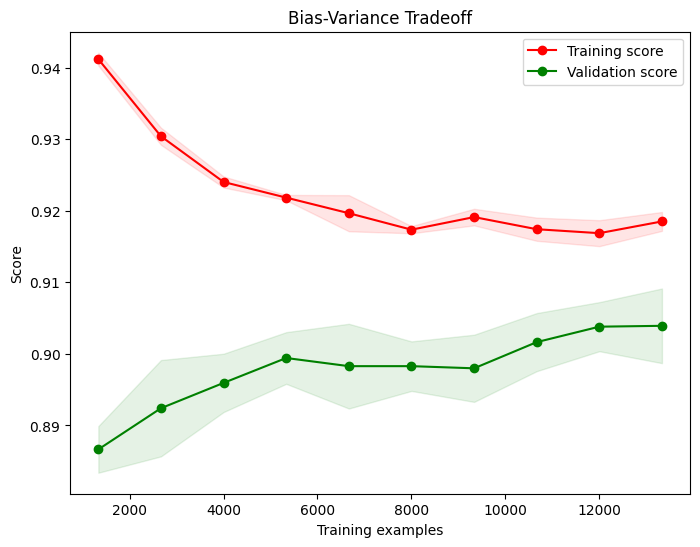

In [ ]:
from sklearn.model_selection import learning_curve
model = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=2, min_samples_leaf=1)
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve with error bars
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                                  color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='g')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Bias-Variance Tradeoff')
plt.show()

In [ ]:
# Define the parameter grid to search
param_grid = {'max_depth': [2, 3, 5, 7, 9],
              'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12],
              'min_samples_leaf': [1, 2, 4, 6, 8],
              'criterion': ['gini', 'entropy']}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 12}
Best accuracy: 0.9065609606714338


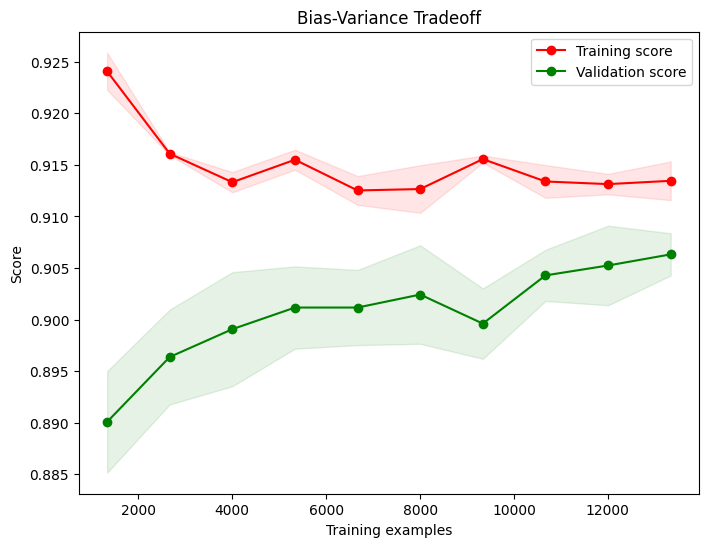

In [ ]:
from sklearn.model_selection import learning_curve
model = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=8, min_samples_leaf=6)
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve with error bars
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                                  color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='g')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Bias-Variance Tradeoff')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_train = rfc.predict(X_train)
print('\nRandom Forest Classifier:\n')
print(classification_report(y_train, y_pred_train))
print('-------------------------------------------------------------')
print('Accuracy:', accuracy_score(y_train,y_pred_train))
print('-------------------------------------------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_train))


Random Forest Classifier:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13443
           1       1.00      1.00      1.00       612
           2       1.00      1.00      1.00      2619

    accuracy                           1.00     16674
   macro avg       1.00      1.00      1.00     16674
weighted avg       1.00      1.00      1.00     16674

-------------------------------------------------------------
Accuracy: 0.9998200791651674
-------------------------------------------------------------
Confusion Matrix:
 [[13442     0     1]
 [    1   611     0]
 [    1     0  2618]]


In [ ]:
rfc_pred = rfc.predict(X_test)
print('\nRandom Forest Classifier:\n')
print(classification_report(y_test, rfc_pred))
print('---------------------------------------------------------------')
print('Accuracy:', accuracy_score(y_test, rfc_pred))
print('---------------------------------------------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test, rfc_pred))


Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5742
           1       0.92      0.74      0.82       267
           2       0.79      0.63      0.70      1137

    accuracy                           0.91      7146
   macro avg       0.88      0.78      0.82      7146
weighted avg       0.90      0.91      0.90      7146

---------------------------------------------------------------
Accuracy: 0.906661069129583
---------------------------------------------------------------
Confusion Matrix:
 [[5568    8  166]
 [  43  198   26]
 [ 415    9  713]]


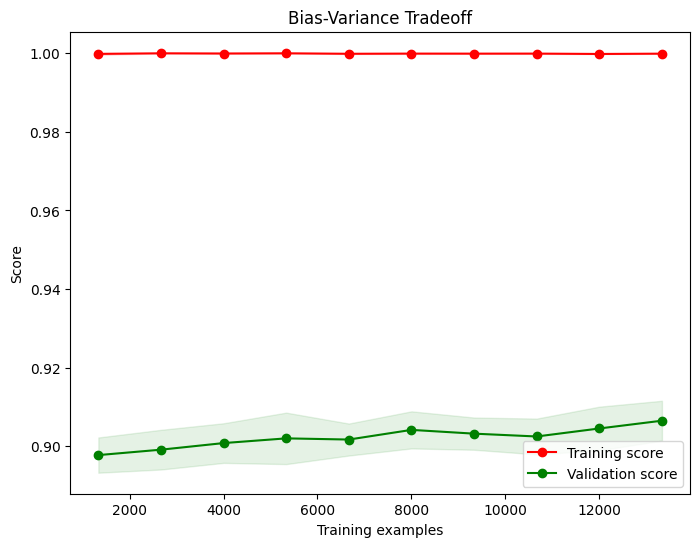

In [ ]:
from sklearn.model_selection import learning_curve
model = RandomForestClassifier()
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve with error bars
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                                  color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='g')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Bias-Variance Tradeoff')
plt.show()

# SMOTE DT

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_smote,y_train_smote,test_size=0.3, random_state=42)

In [ ]:
X.shape

(23820, 30)

In [ ]:
X_train_smote.shape

(57555, 30)

In [ ]:
y_train.value_counts()

RetentionPotentialEncoded
2                            13522
0                            13406
1                            13360
dtype: int64

In [ ]:
clf = DecisionTreeClassifier(max_depth=7)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
y_pred_train = clf.predict(X_train)
print('\nDecision Tree Classifier:\n')
print(classification_report(y_train, y_pred_train))
print('-------------------------------------------------------------')
print('Accuracy:', accuracy_score(y_train,y_pred_train))
print('-------------------------------------------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_train))



Decision Tree Classifier:

              precision    recall  f1-score   support

           0       0.91      0.80      0.85     13406
           1       0.95      0.96      0.95     13360
           2       0.82      0.91      0.86     13522

    accuracy                           0.89     40288
   macro avg       0.89      0.89      0.89     40288
weighted avg       0.89      0.89      0.89     40288

-------------------------------------------------------------
Accuracy: 0.8886765289912629
-------------------------------------------------------------
Confusion Matrix:
 [[10713   342  2351]
 [  188 12779   393]
 [  920   291 12311]]


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('\nDecision Tree Classifier:\n')
print(classification_report(y_test, y_pred))
print('-------------------------------------------------------------')
print('Accuracy:', accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))



Decision Tree Classifier:

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      5779
           1       0.95      0.95      0.95      5825
           2       0.81      0.91      0.86      5663

    accuracy                           0.89     17267
   macro avg       0.89      0.89      0.89     17267
weighted avg       0.89      0.89      0.89     17267

-------------------------------------------------------------
Accuracy: 0.8870678172236057
-------------------------------------------------------------
Confusion Matrix:
 [[4627  156  996]
 [  81 5560  184]
 [ 395  138 5130]]


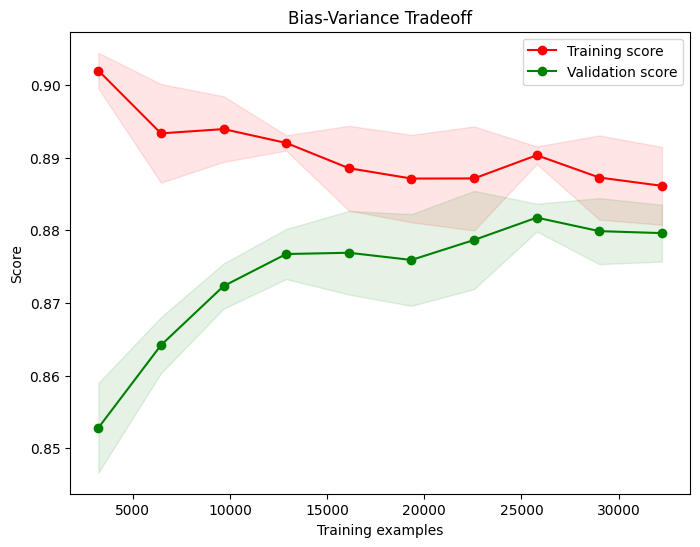

In [ ]:
from sklearn.model_selection import learning_curve
model = DecisionTreeClassifier(max_depth=7)
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve with error bars
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                                  color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='g')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Bias-Variance Tradeoff')
plt.show()

In [ ]:
# Define the parameter grid to search
param_grid = {'max_depth': [2, 3, 5, 7, 9],
              'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12],
              'min_samples_leaf': [1, 2, 4, 6, 8],
              'criterion': ['gini', 'entropy']}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best accuracy: 0.8931444403031479


In [ ]:
y_pred_train = grid_search.predict(X_train)
print('\nDecision Tree Classifier:\n')
print(classification_report(y_train, y_pred_train))
print('-------------------------------------------------------------')
print('Accuracy:', accuracy_score(y_train,y_pred_train))
print('-------------------------------------------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_train))



Decision Tree Classifier:

              precision    recall  f1-score   support

           0       0.93      0.81      0.87     13406
           1       0.96      0.98      0.97     13360
           2       0.83      0.93      0.88     13522

    accuracy                           0.91     40288
   macro avg       0.91      0.91      0.90     40288
weighted avg       0.91      0.91      0.90     40288

-------------------------------------------------------------
Accuracy: 0.9054060762509929
-------------------------------------------------------------
Confusion Matrix:
 [[10810   319  2277]
 [   59 13058   243]
 [  714   199 12609]]


In [ ]:
y_pred = grid_search.predict(X_test)
print('\nDecision Tree Classifier:\n')
print(classification_report(y_test, y_pred))
print('-------------------------------------------------------------')
print('Accuracy:', accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))



Decision Tree Classifier:

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      5779
           1       0.95      0.97      0.96      5825
           2       0.82      0.92      0.87      5663

    accuracy                           0.90     17267
   macro avg       0.90      0.90      0.90     17267
weighted avg       0.90      0.90      0.90     17267

-------------------------------------------------------------
Accuracy: 0.8970290148838825
-------------------------------------------------------------
Confusion Matrix:
 [[4635  157  987]
 [  49 5647  129]
 [ 339  117 5207]]


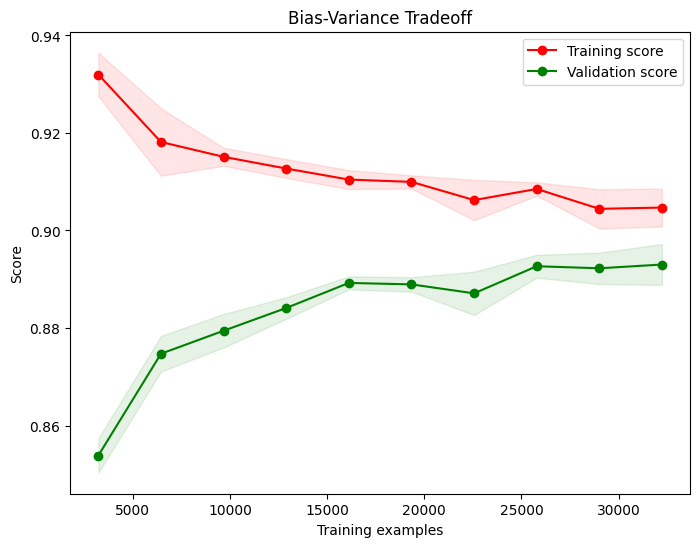

In [ ]:
from sklearn.model_selection import learning_curve
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=9, min_samples_split=4, min_samples_leaf=1)
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve with error bars
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                                  color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='g')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Bias-Variance Tradeoff')
plt.show()

# SMOTE RFC

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_train = rfc.predict(X_train)
print('\nRandom Forest Classifier:\n')
print(classification_report(y_train, y_pred_train))
print('-------------------------------------------------------------')
print('Accuracy:', accuracy_score(y_train,y_pred_train))
print('-------------------------------------------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_train))



Random Forest Classifier:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13406
           1       1.00      1.00      1.00     13360
           2       1.00      1.00      1.00     13522

    accuracy                           1.00     40288
   macro avg       1.00      1.00      1.00     40288
weighted avg       1.00      1.00      1.00     40288

-------------------------------------------------------------
Accuracy: 1.0
-------------------------------------------------------------
Confusion Matrix:
 [[13406     0     0]
 [    0 13360     0]
 [    0     0 13522]]


In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print('\nRandom Forest Classifier:\n')
print(classification_report(y_test, y_pred))
print('-------------------------------------------------------------')
print('Accuracy:', accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      5779
           1       0.98      0.99      0.99      5825
           2       0.92      0.93      0.93      5663

    accuracy                           0.95     17267
   macro avg       0.95      0.95      0.95     17267
weighted avg       0.95      0.95      0.95     17267

-------------------------------------------------------------
Accuracy: 0.9464875195459547
-------------------------------------------------------------
Confusion Matrix:
 [[5316   48  415]
 [  36 5768   21]
 [ 364   40 5259]]


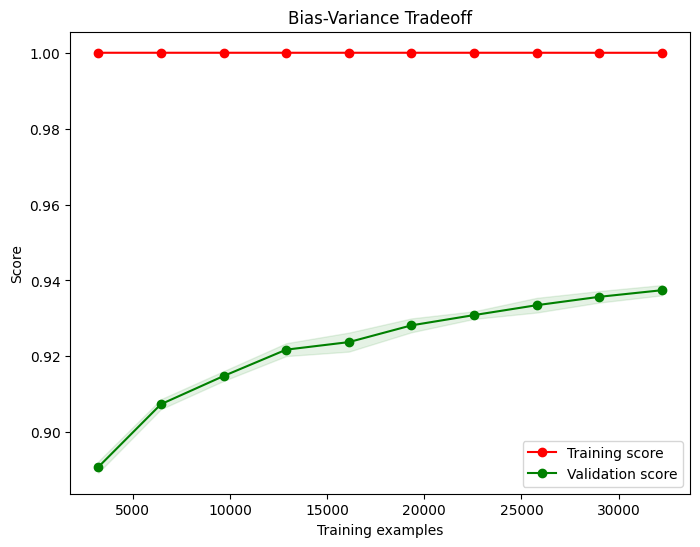

In [ ]:
from sklearn.model_selection import learning_curve
model = RandomForestClassifier()
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve with error bars
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                                  color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='g')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Bias-Variance Tradeoff')
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

y_pred_train = grid_search.predict(X_train)

print(classification_report(y_train, y_pred_train))

y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))



Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13406
           1       1.00      1.00      1.00     13360
           2       1.00      1.00      1.00     13522

    accuracy                           1.00     40288
   macro avg       1.00      1.00      1.00     40288
weighted avg       1.00      1.00      1.00     40288

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5779
           1       0.99      0.99      0.99      5825
           2       0.92      0.93      0.93      5663

    accuracy                           0.95     17267
   macro avg       0.95      0.95      0.95     17267
weighted avg       0.95      0.95      0.95     17267



In [ ]:
X_train.columns

Index(['City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay', 'OrderQuantity', 'no_of_order',
       'retention_rate_2008', 'retention_rate_2009', 'retention_rate_2010',
       'retention_rate_2011', 'retention_rate_2012', 'retention_rate_2013',
       'retention_rate_2014', 'retention_rate_2015', 'retention_rate_2016',
       'retention_rate_2017', 'retention_rate_2018', 'retained', 'days_R_F',
       'DaysSinceRegistration', 'DaysSinceLastOrder', 'Days_F_L',
       'Customizedemailcount', 'opened-yes', 'opened-no', 'clicked-yes',
       'clicked-no', 'DaysSincelastEmail', 'diff_firstmail_and_order'],
      dtype='object')

In [ ]:
test.columns

Index(['City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay', 'OrderQuantity', 'no_of_order',
       'retention_rate_2008', 'retention_rate_2009', 'retention_rate_2010',
       'retention_rate_2011', 'retention_rate_2012', 'retention_rate_2013',
       'retention_rate_2014', 'retention_rate_2015', 'retention_rate_2016',
       'retention_rate_2017', 'retention_rate_2018', 'retained', 'days_R_F',
       'DaysSinceRegistration', 'DaysSinceLastOrder', 'Days_F_L',
       'Customizedemailcount', 'opened-yes', 'opened-no', 'clicked-yes',
       'clicked-no', 'DaysSincelastEmail', 'diff_firstmail_and_order'],
      dtype='object')

In [ ]:
test_pred= grid_search.predict(test)

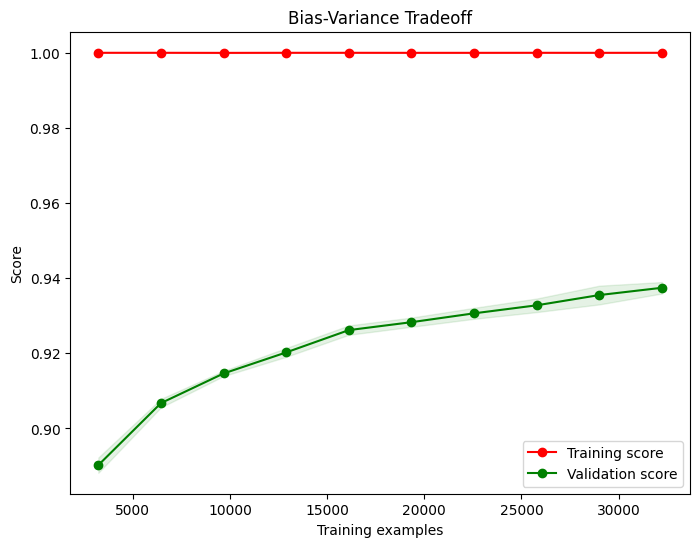

In [ ]:
from sklearn.model_selection import learning_curve
model = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve with error bars
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                                  color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='g')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Bias-Variance Tradeoff')
plt.show()

In [ ]:
test_pred

array([2, 0, 0, ..., 1, 1, 1])

In [ ]:
results=pd.DataFrame(test_pred)

In [ ]:
results.columns=['RetentionPotential']

In [ ]:
index=pd.read_excel("/content/drive/MyDrive/DataForPHD/TestData/Test.xlsx")

In [ ]:
pred = pd.concat([index['CustomerID'], results['RetentionPotential']], axis=1)

In [ ]:
pred.set_index('CustomerID')

RetentionPotential
CustomerID                    
C12121                       2
C12132                       0
C12134                       0
C12135                       0
C12136                       1
...                        ...
C42153                       1
C42155                       1
C42157                       1
C42167                       1
C42190                       1

[5955 rows x 1 columns]

In [ ]:
pred.to_excel('predictions.xlsx', index=True)

# Extracting patterns



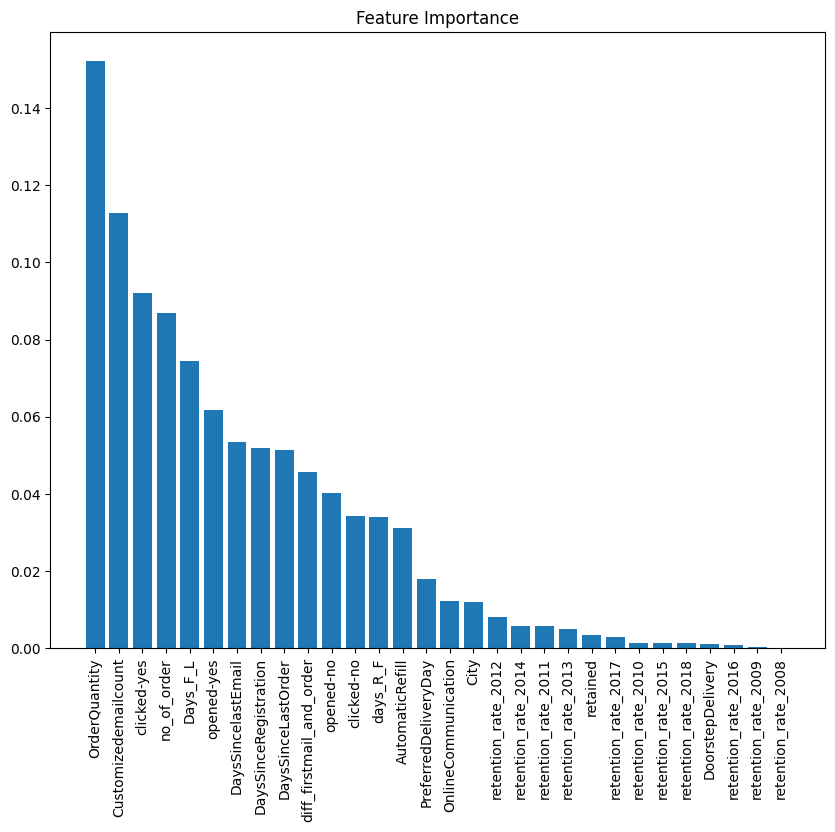

In [ ]:
model = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train,y_train)
# Plot the feature importance graph
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,8))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


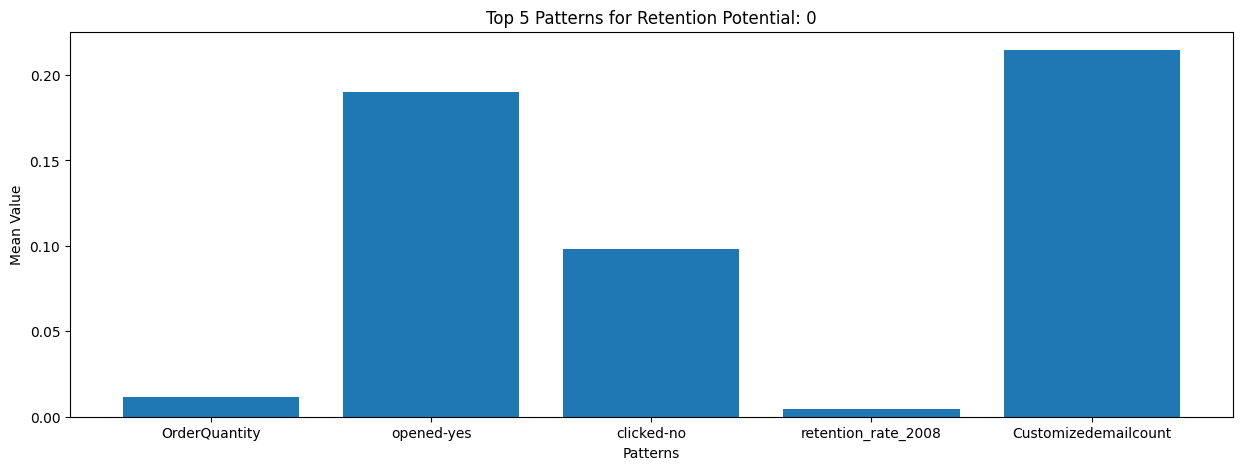

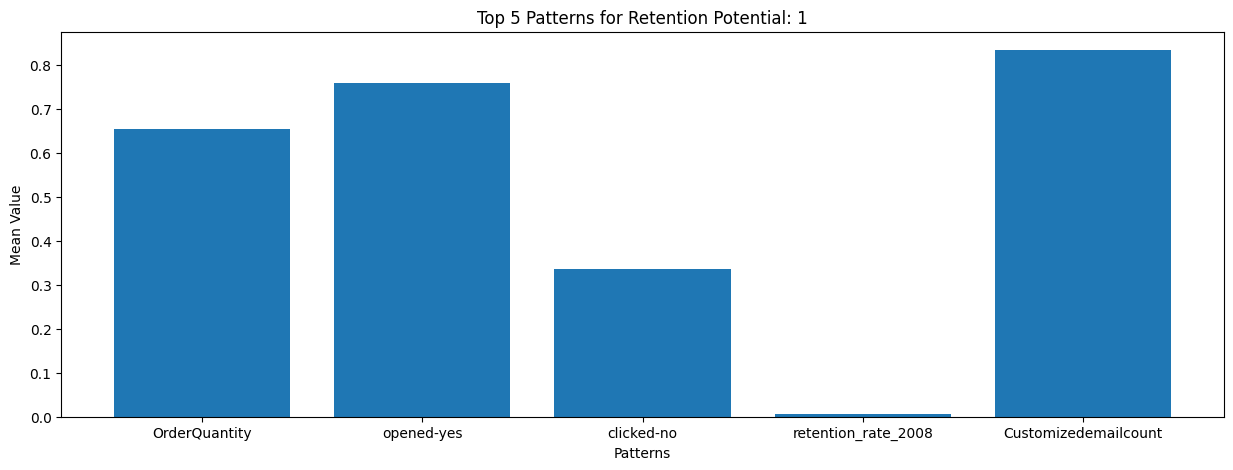

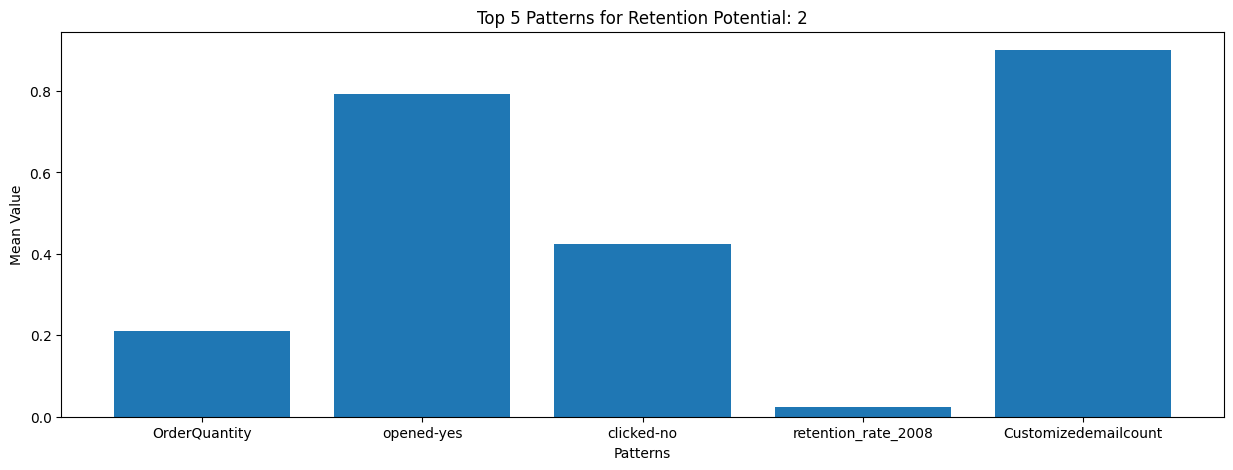

In [ ]:
# Extract the top 5 most important features
importances = model.feature_importances_
indices = importances.argsort()[-5:][::-1]
top_5_patterns = [importance_columns[i] for i in indices]

# Plot the bar chart for each retention potential group
for potential in [0, 1, 2]:
    df = train[train['RetentionPotentialEncoded'] == potential]
    top_5_patterns_df = df.describe().transpose().sort_values('mean', ascending=False).loc[top_5_patterns].abs()
    
    # Plot the bar chart
    plt.figure(figsize=(15,5))
    plt.bar(top_5_patterns_df.index, top_5_patterns_df['mean'])
    plt.title('Top 5 Patterns for Retention Potential: '+str(potential))
    plt.xlabel("Patterns")
    plt.ylabel("Mean Value")
    
    plt.show()




# Top 5 patterns in the data

In [ ]:
top_5_patterns_high = train[train['RetentionPotentialEncoded']==2].describe().transpose().sort_values('mean', ascending=False)[:5][['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
top_5_patterns_medium = train[train['RetentionPotentialEncoded']==1].describe().transpose().sort_values('mean', ascending=False)[:5][['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
top_5_patterns_low = train[train['RetentionPotentialEncoded']==0].describe().transpose().sort_values('mean', ascending=False)[:5][['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

print('\nTop 5 Patterns for High Retention Potential:\n', top_5_patterns_high)
print('\nTop 5 Patterns for Medium Retention Potential:\n', top_5_patterns_medium)
print('\nTop 5 Patterns for Low Retention Potential:\n', top_5_patterns_low)



Top 5 Patterns for High Retention Potential:
                                mean       std  min  25%  50%  75%   max
PreferredDeliveryDay       3.181310  2.233955  0.0  1.0  4.0  5.0   6.0
City                       2.000266  0.932474  0.0  1.0  2.0  3.0   3.0
RetentionPotentialEncoded  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0
no_of_order                1.371140  1.297404  1.0  1.0  1.0  1.0  41.0
retained                   0.998136  0.043136  0.0  1.0  1.0  1.0   1.0

Top 5 Patterns for Medium Retention Potential:
                                 mean        std       min       25%      50%  \
no_of_order                13.772469  21.066834  1.000000  3.000000  7.00000   
PreferredDeliveryDay        3.215017   2.225438  0.000000  1.000000  4.00000   
City                        1.733788   0.942363  0.000000  1.000000  1.00000   
RetentionPotentialEncoded   1.000000   0.000000  1.000000  1.000000  1.00000   
Days_F_L                    0.912958   1.485656 -0.394164 -0.194682  0.3

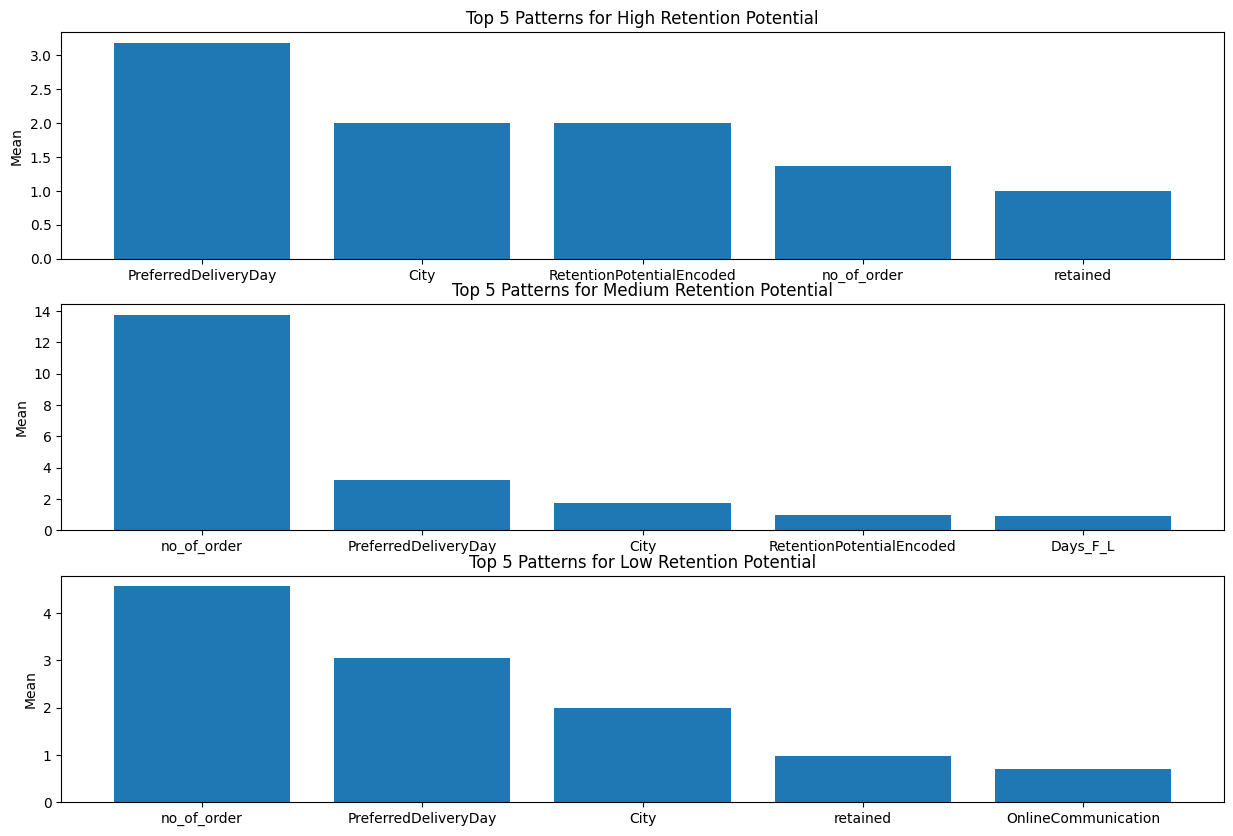

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Plot the top 5 patterns for High Retention Potential
plt.subplot(3, 1, 1)
plt.bar(top_5_patterns_high.index, top_5_patterns_high['mean'])
plt.title('Top 5 Patterns for High Retention Potential')
plt.ylabel('Mean')

# Plot the top 5 patterns for Medium Retention Potential
plt.subplot(3, 1, 2)
plt.bar(top_5_patterns_medium.index, top_5_patterns_medium['mean'])
plt.title('Top 5 Patterns for Medium Retention Potential')
plt.ylabel('Mean')

# Plot the top 5 patterns for Low Retention Potential
plt.subplot(3, 1, 3)
plt.bar(top_5_patterns_low.index, top_5_patterns_low['mean'])
plt.title('Top 5 Patterns for Low Retention Potential')
plt.ylabel('Mean')

# Show the plot
plt.show()
